## Importing Modules

## 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## 

## 1. 	Data Collection and Exploration:

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('ds.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

## 

#### Understanding the structure

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 

In [5]:
svalue=(round(loan_dataset.describe().transpose(),2))#printing them with rounding them to increase readibility
print(svalue)
svalue.index


                   count     mean      std    min     25%     50%      75%  \
ApplicantIncome    614.0  5403.46  6109.04  150.0  2877.5  3812.5  5795.00   
CoapplicantIncome  614.0  1621.25  2926.25    0.0     0.0  1188.5  2297.25   
LoanAmount         592.0   146.41    85.59    9.0   100.0   128.0   168.00   
Loan_Amount_Term   600.0   342.00    65.12   12.0   360.0   360.0   360.00   
Credit_History     564.0     0.84     0.36    0.0     1.0     1.0     1.00   

                       max  
ApplicantIncome    81000.0  
CoapplicantIncome  41667.0  
LoanAmount           700.0  
Loan_Amount_Term     480.0  
Credit_History         1.0  


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

## 

In [6]:
# number of rows and columns
loan_dataset.shape

(614, 13)

### 

In [7]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 

#### Types of data

In [8]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 

### 

### NULL VALUES

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 

#### Potential Issue: Potential issue can be null values and some outliers

#### Solutions:
1. Fillna to fill outliers as dataset is also small. So we should not remove that much.
2. Outliers should be remove with box plot


### Note: 
1. Dataset is smaller , so we should not try to remove that much value.
2. We should not use zscore and iqr in this case
3. Box plot is good choice

### 

### 

### 

## 2.	Data Cleaning and Transformation:

In [10]:
import missingno as mano#missingo is module for missing values

## 

### Mano-bar

#### Mano bar shows which features has missing or null data as 1.0 refers to 100 percent

In [11]:
import matplotlib.pyplot as plt

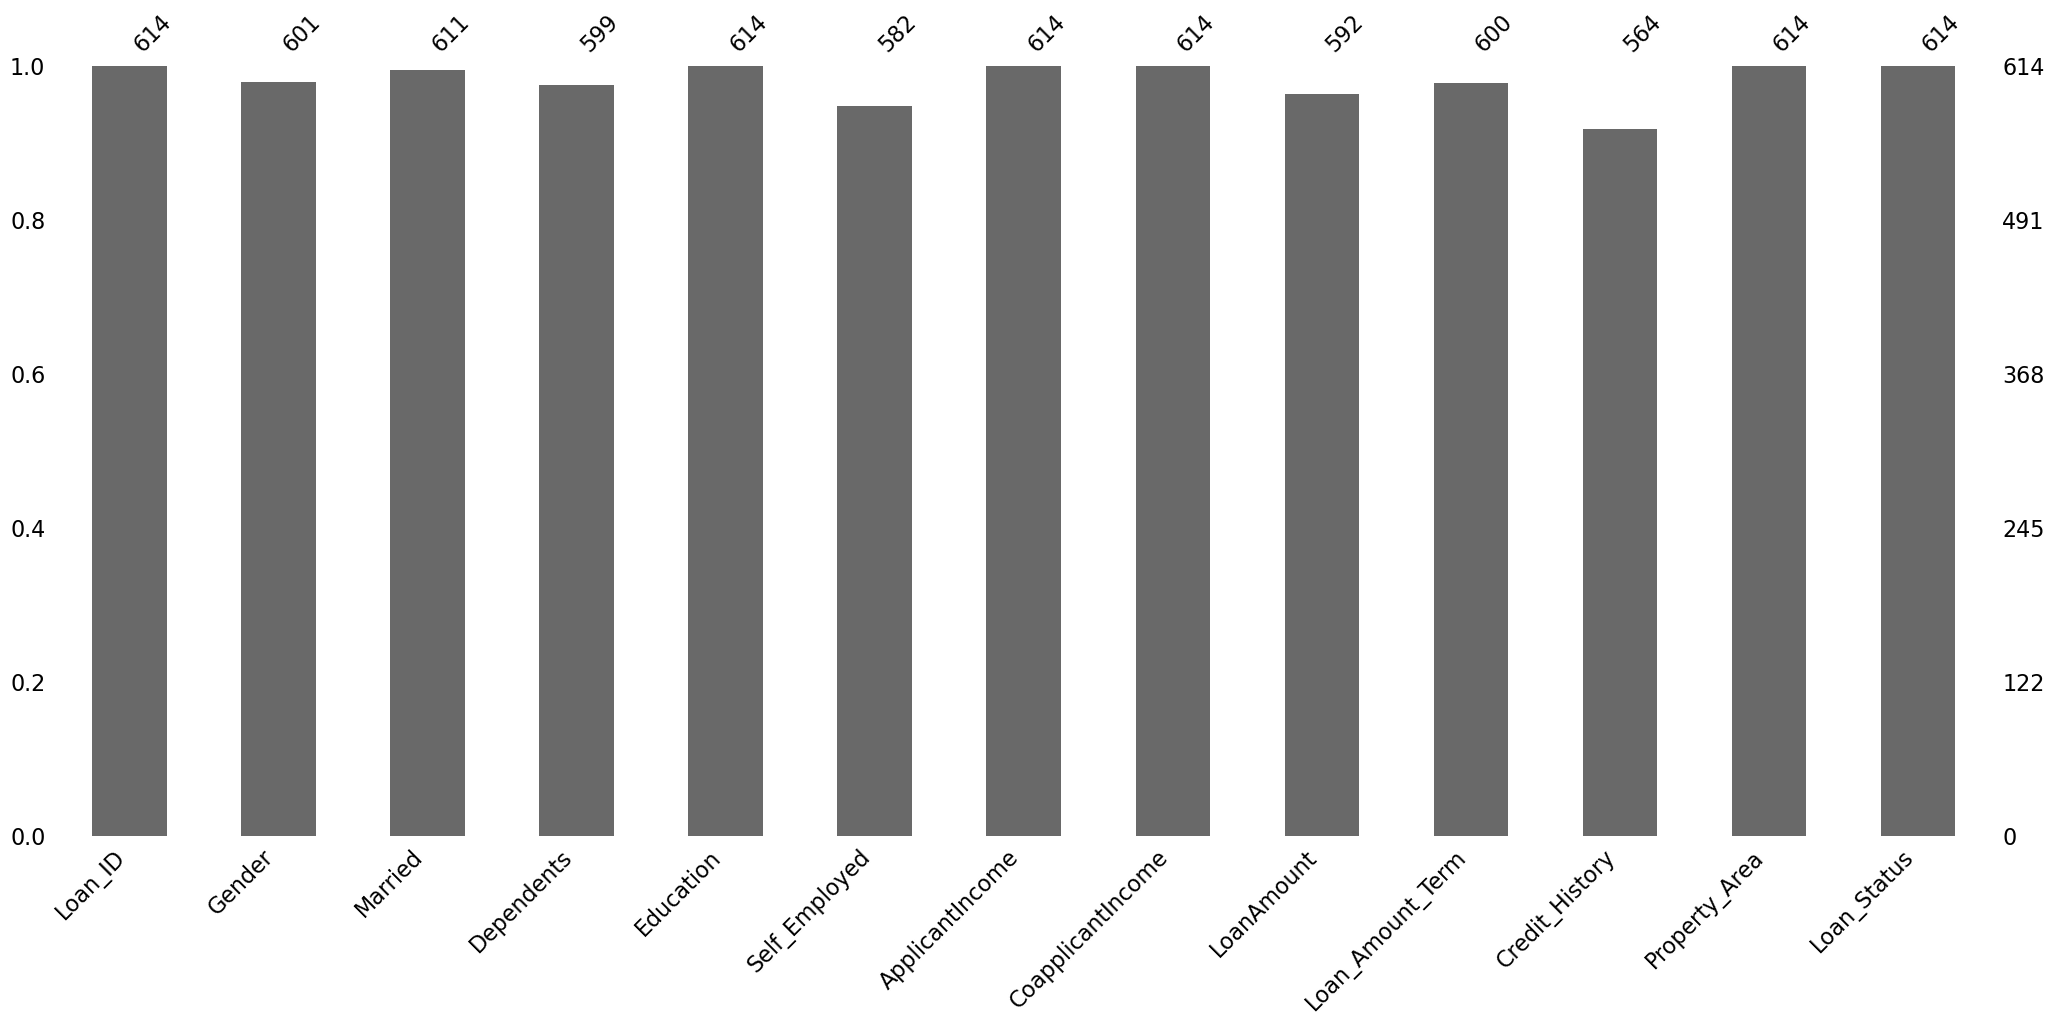

In [12]:
#shows bar of missing values
mano.bar(loan_dataset)
plt.show()

### 

### 

### 

### Mano Matrix

### white line refers to missing values in mano

<Axes: >

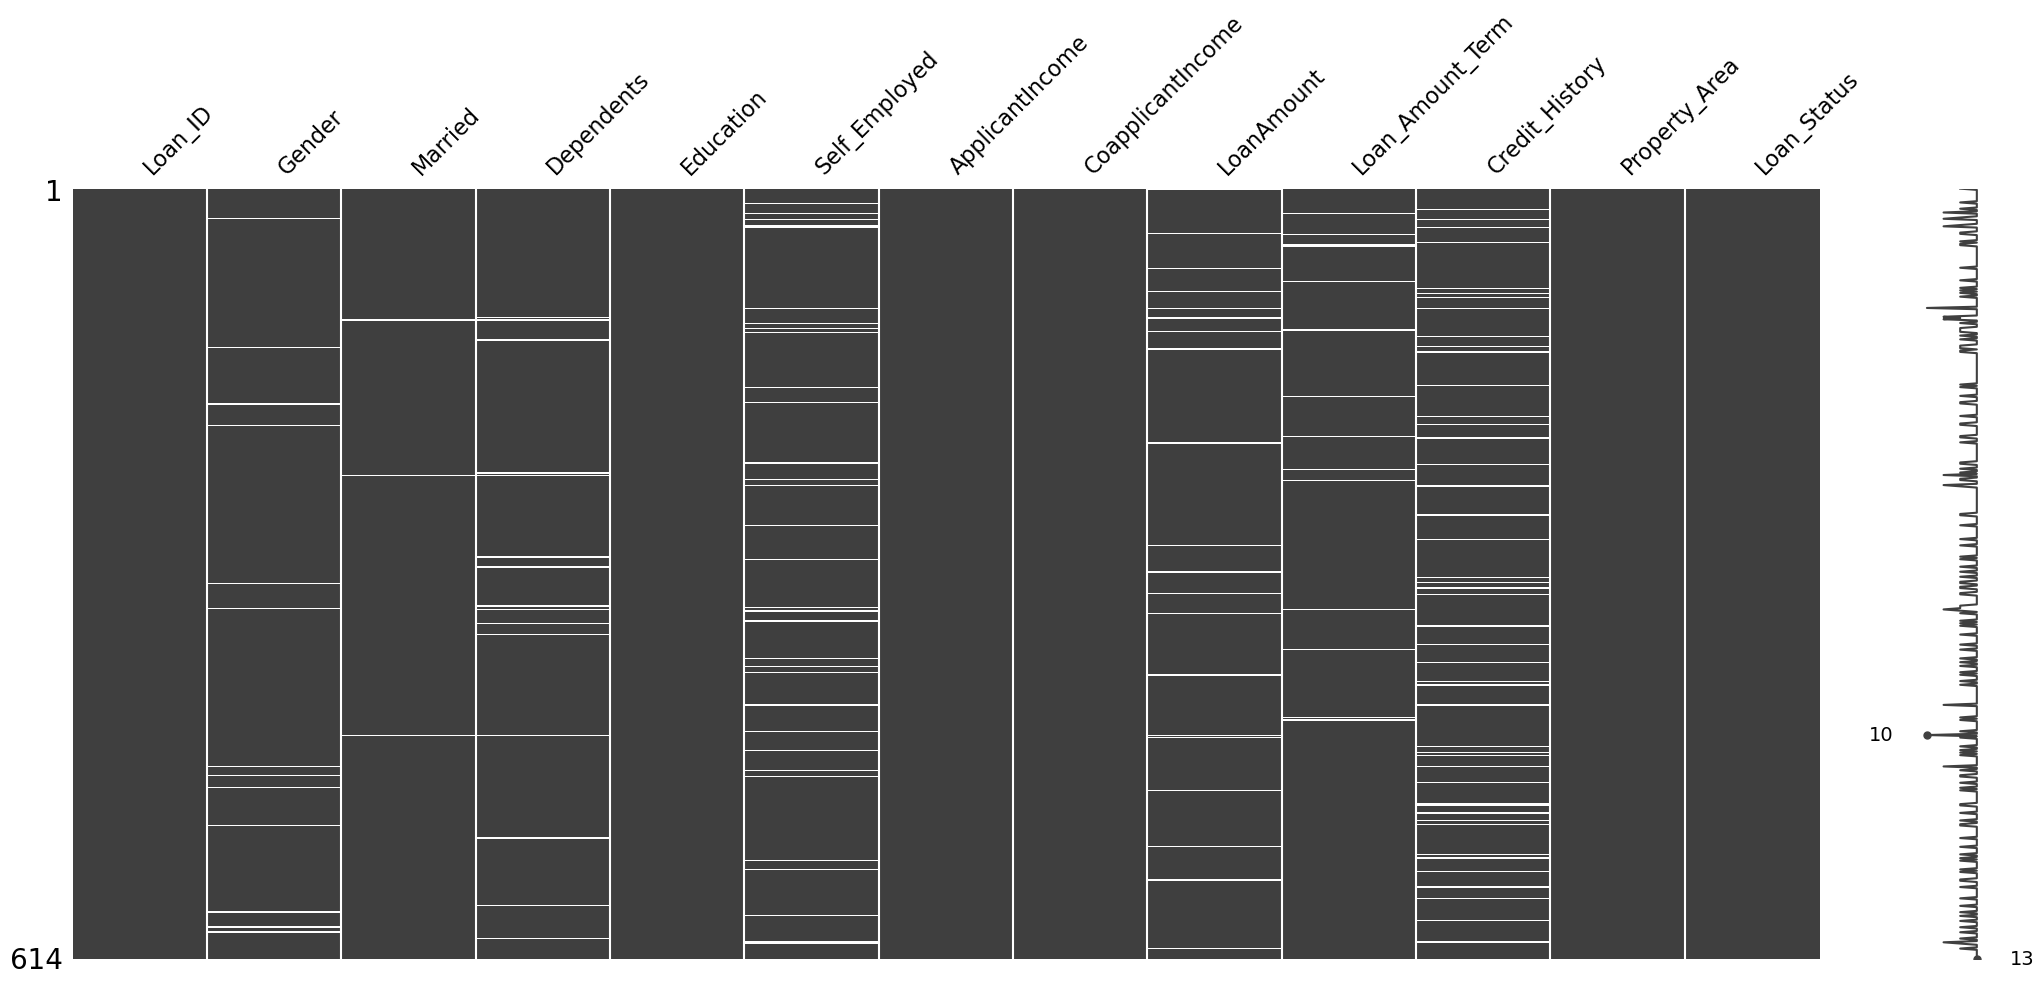

In [13]:
#shows or highlight missing value with white line
mano.matrix(loan_dataset)


### 

### 

### 

#### Missingno heatmap value refers to missing correlation , it simply means what is the chance of having null value when the other compared column is null

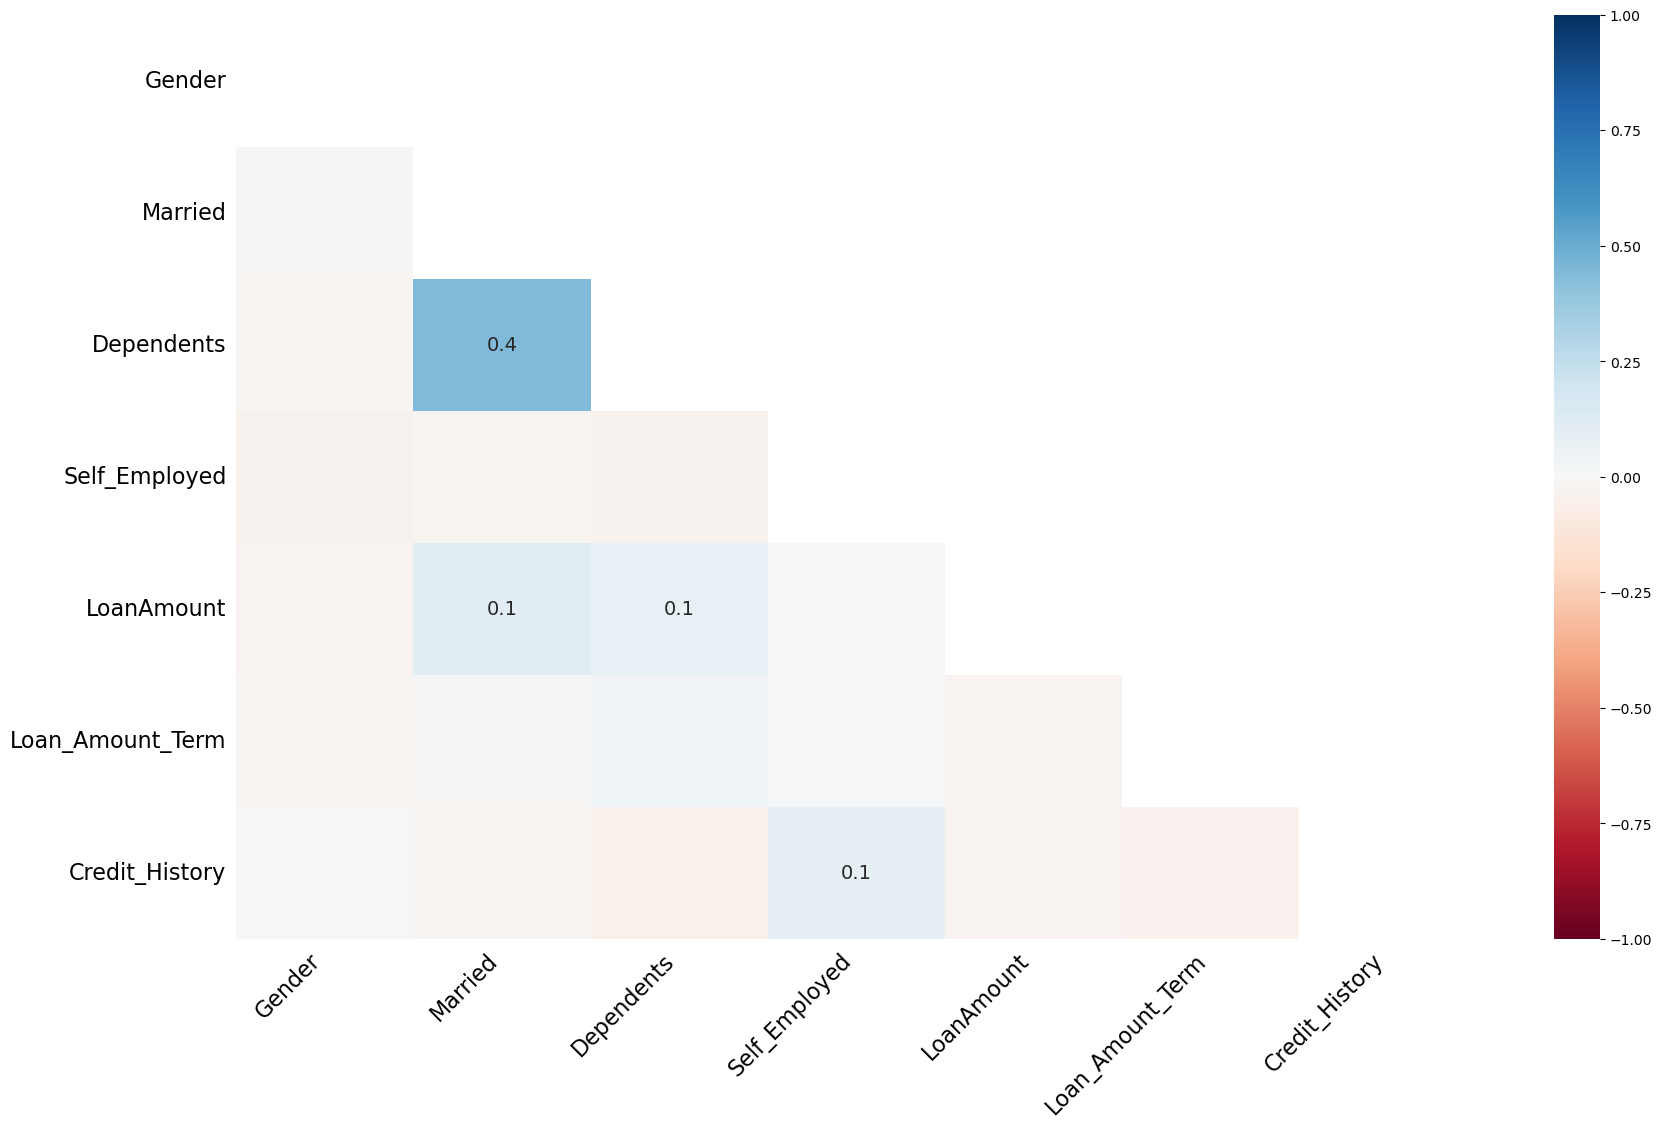

In [14]:
#heatmap to see corrlation of missing values of each features
import missingno as mano
mano.heatmap(loan_dataset)
plt.show()

### 

#### FROM ABOVE:
1. So 40 percent time dependents was missing married was missing too

### 

### 

In [15]:
#To see null value in each features
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#percentage of null value in each column
100*loan_dataset.isnull().sum()/len(loan_dataset)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [17]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 

#### list for only continous features

In [18]:
#This list is used to find structure of data and fill according to the data
columns=['LoanAmount','Loan_Amount_Term','Credit_History']

### 

### All can be filled with mode,median and mean according to data

##### histogram to check skewness and normalized of int data or float data

In [19]:
col=2
rows=2

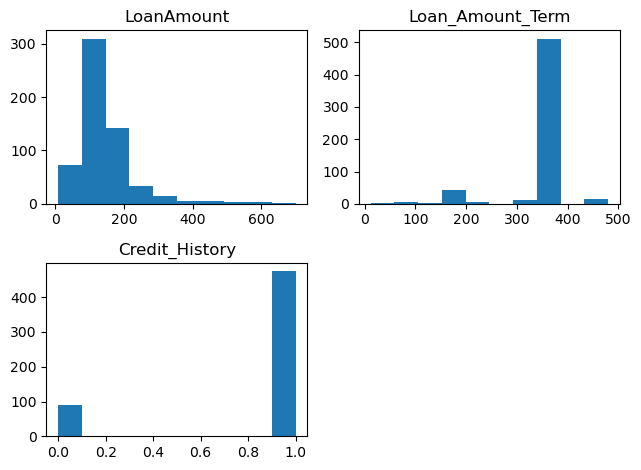

In [20]:
#for loop helps to go every feature in the cop dataframe
    #enumerate helps to count to every feature in same order as original datafrane and starts from 0
for i,column in enumerate(columns):
    #subplot allows different features in single frame by dividing rows and columns
    plt.subplot(rows,col,i+1)
    #making each histograms
    plt.hist(loan_dataset[column],bins=10)
    plt.title(column)
plt.tight_layout()#it adjusts spacing between subplot
plt.show()

### 

### Note:
1. Loan_amount is right skewed .
2. Loan_Amount_term is also skewed , so fill with median().

### 

#### Median based fill for skewed

In [21]:
#normalized hist features llist ,so mean filling missing values
med_fill=['LoanAmount','Loan_Amount_Term']
#fillna helps to fill missing values with
loan_dataset[med_fill]=loan_dataset[med_fill].fillna(loan_dataset[med_fill].mean())

In [22]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 

### Encoding before Mode based fillna

### label encoding


### 

In [23]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### 

In [24]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

### 

### Visualization before encoding

In [25]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [26]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

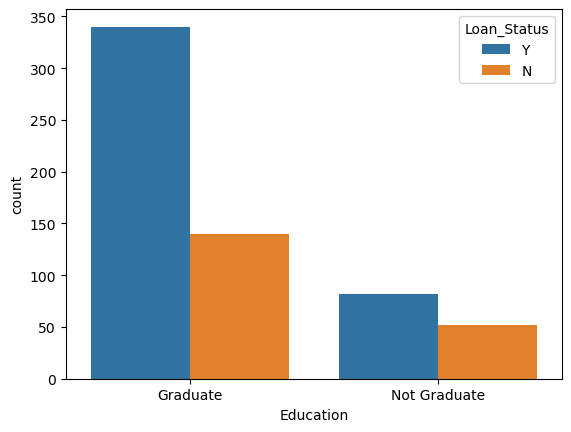

In [27]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

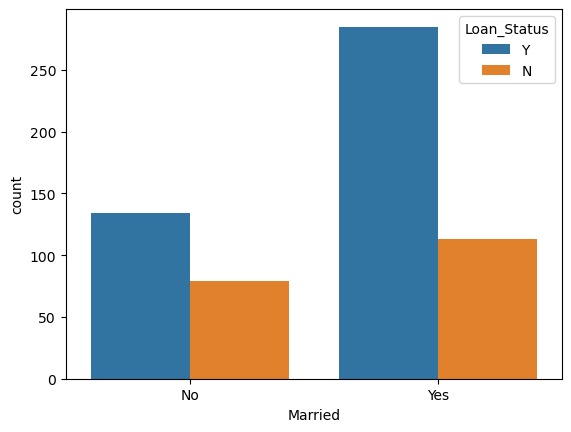

In [28]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

### 

### Overview
1. There are graduate and marries people more in applying loan.
2. 

## 

#### Encoding to numerical

In [29]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


## 

### Encoding values:
1. Married : Yes to 1 and NO to 0.
2. Gender : Male to 1 and Female to 0
3. Self employed: No to 0 and Yes to 1
4. Property : Rural is 0, Semi-urban is 1 , Urban is 2
5. Education: Graduate :1 , non graduate :0


## 

In [30]:
loan_dataset['Loan_Status']=loan_dataset['Loan_Status'].replace(['Y','N'],[1.0,0])#replacing yes to 1 and no to 0

In [31]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0


### 

#### Mode based fillna

In [32]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
loan_dataset['Gender']=loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married']=loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0])

In [34]:
loan_dataset['Dependents']=loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Self_Employed']=loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0])

In [35]:
loan_dataset['Credit_History']=loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0])

In [36]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 

## 

### CHECK FOR DUPLICATION

In [37]:
#checking if there are duplication
loan_dataset.duplicated().sum()

0

##### No duplicate data so we can move ahead

### 

### 

In [38]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1.0
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1.0
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1.0
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1.0


### 

In [39]:
loan_dataset.shape

(614, 13)

In [40]:
#normalize: helps to show in percentage . Value_counts counts total number of data falls in these values
loan_dataset['Gender'].value_counts(normalize=True)

Gender
1.0    0.81759
0.0    0.18241
Name: proportion, dtype: float64

### info:
More males in data like in 80:20 ratio

### 

In [41]:
#normalize: helps to show in percentage . Value_counts counts total number of data falls in these values
loan_dataset['Dependents'].value_counts(normalize=True)

Dependents
0    0.586319
1    0.166124
2    0.164495
4    0.083062
Name: proportion, dtype: float64

### We get to know
1. No dependents are more in data

### 

In [42]:
#normalize: helps to show in percentage . Value_counts counts total number of data falls in these values
loan_dataset['Education'].value_counts(normalize=True)

Education
1    0.781759
0    0.218241
Name: proportion, dtype: float64

#### We get to know
1. More educated people apply for the loan

### 

In [43]:
#normalize: helps to show in percentage . Value_counts counts total number of data falls in these values
loan_dataset['Self_Employed'].value_counts(normalize=True)

Self_Employed
0.0    0.86645
1.0    0.13355
Name: proportion, dtype: float64

### We get get to know
1. Non self employee apply for the loan

### 

In [44]:
#normalize: helps to show in percentage . Value_counts counts total number of data falls in these values
loan_dataset['Credit_History'].value_counts(normalize=True)

Credit_History
1.0    0.855049
0.0    0.144951
Name: proportion, dtype: float64

### We get to know:
1.People with credit history apply for the loan

### 

In [45]:
#normalize: helps to show in percentage . Value_counts counts total number of data falls in these values
loan_dataset['Loan_Status'].value_counts(normalize=True)

Loan_Status
1.0    0.687296
0.0    0.312704
Name: proportion, dtype: float64

#### We get to know:
1. 68 percent loan is approved so data is imbalance

### 

### 

### 

## 

### CONVERTING ALL FEATURES TO FLOAT

#### Making all features to same dtype help our model to be more effective

In [46]:
# Convert columns to appropriate numerical types if needed
loan_dataset['Gender'] = loan_dataset['Gender'].astype(float)
loan_dataset['Dependents'] = loan_dataset['Dependents'].astype(float)


In [47]:
# Convert columns to appropriate numerical types if needed
loan_dataset['Education'] = loan_dataset['Education'].astype(float)
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].astype(float)


In [48]:
# Convert columns to appropriate numerical types if needed
loan_dataset['ApplicantIncome'] = loan_dataset['ApplicantIncome'].astype(float)
loan_dataset['CoapplicantIncome'] = loan_dataset['CoapplicantIncome'].astype(float)


In [49]:
# Convert columns to appropriate numerical types if needed
loan_dataset['Married'] = loan_dataset['Married'].astype(float)
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].astype(float)


In [50]:
# Convert columns to appropriate numerical types if needed
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].astype(float)
loan_dataset['Credit_History'] = loan_dataset['Credit_History']

In [51]:
# Convert columns to appropriate numerical types if needed
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].astype(float)
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status']

### 

### 

In [52]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID'],axis=1)


### 

### Remove Outliers:
VARIANCE,MEAN,MEDIAN OF ALL BEFORE REMOVING OUTLIERS

In [53]:
#for loop to see mean,median and std of each features with numpy library
for all in X.columns:
    print(f"The mean of {all} is {np.mean(X[all])}")
    print(f"The median of {all} is {np.median(X[all])}")
    print(f"The variance of {all} is {np.var(X[all])}\n")
    

The mean of Gender is 0.8175895765472313
The median of Gender is 1.0
The variance of Gender is 0.14913686086854935

The mean of Married is 0.6530944625407166
The median of Married is 1.0
The variance of Married is 0.22656208553936855

The mean of Dependents is 0.8273615635179153
The median of Dependents is 0.0
The variance of Dependents is 1.4685673057538966

The mean of Education is 0.7817589576547231
The median of Education is 1.0
The variance of Education is 0.17061188978132436

The mean of Self_Employed is 0.13355048859934854
The median of Self_Employed is 0.0
The variance of Self_Employed is 0.1157147555942228

The mean of ApplicantIncome is 5403.459283387622
The median of ApplicantIncome is 3812.5
The variance of ApplicantIncome is 37259607.772772074

The mean of CoapplicantIncome is 1621.2457980271008
The median of CoapplicantIncome is 1188.5
The variance of CoapplicantIncome is 8548983.37910648

The mean of LoanAmount is 146.41216216216216
The median of LoanAmount is 129.0
The 

#### box plot of all data features to remove the outlier that can be removed
#plot boxplot to see outliers

<Axes: >

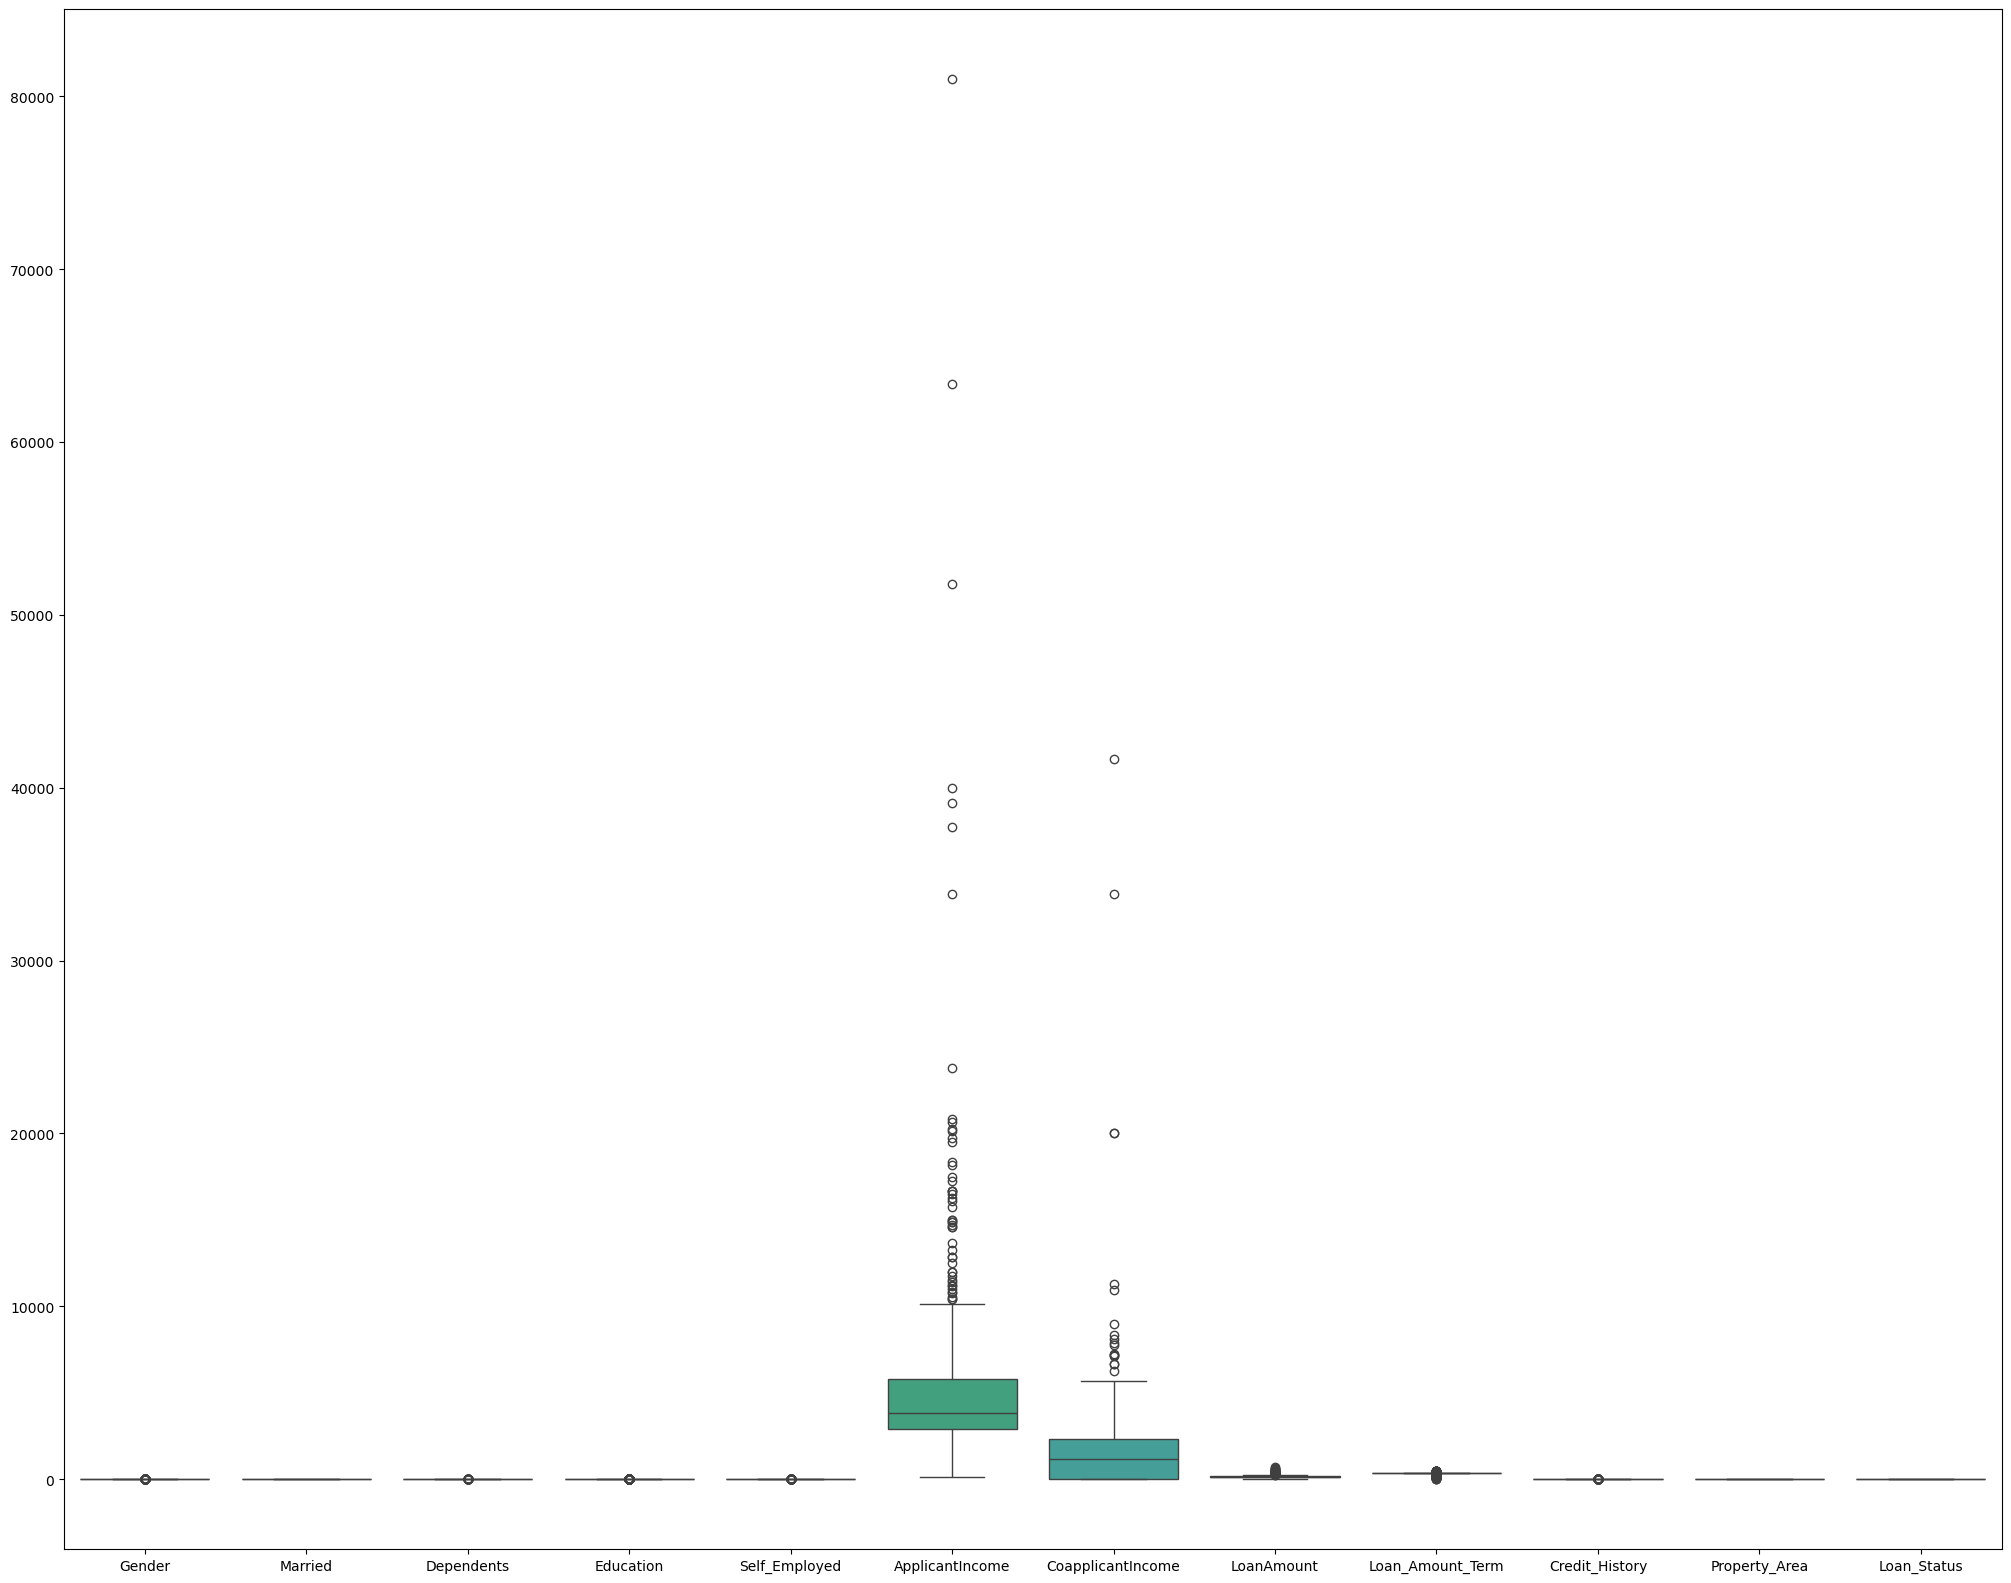

In [54]:
plt.figure(figsize=(25,20),facecolor='w')
sns.boxplot(data=X)

#### From the figure we can conclude 

In [55]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


## 

In [56]:
#we can just remove max value so a lot of info is not missed
print(X['CoapplicantIncome'].max())
X['ApplicantIncome'].max()

41667.0


81000.0

## 

In [57]:
X=X[X['CoapplicantIncome']<33837.0]
X=X[X['ApplicantIncome']<81000.0]
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        1.0            0.0           5849.0   
1       1.0      1.0         1.0        1.0            0.0           4583.0   
2       1.0      1.0         0.0        1.0            1.0           3000.0   
3       1.0      1.0         0.0        0.0            0.0           2583.0   
4       1.0      0.0         0.0        1.0            0.0           6000.0   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        1.0            0.0           2900.0   
610     1.0      1.0         4.0        1.0            0.0           4106.0   
611     1.0      1.0         1.0        1.0            0.0           8072.0   
612     1.0      1.0         2.0        1.0            0.0           7583.0   
613     0.0      0.0         0.0        1.0            1.0           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

## 

## 

<Axes: >

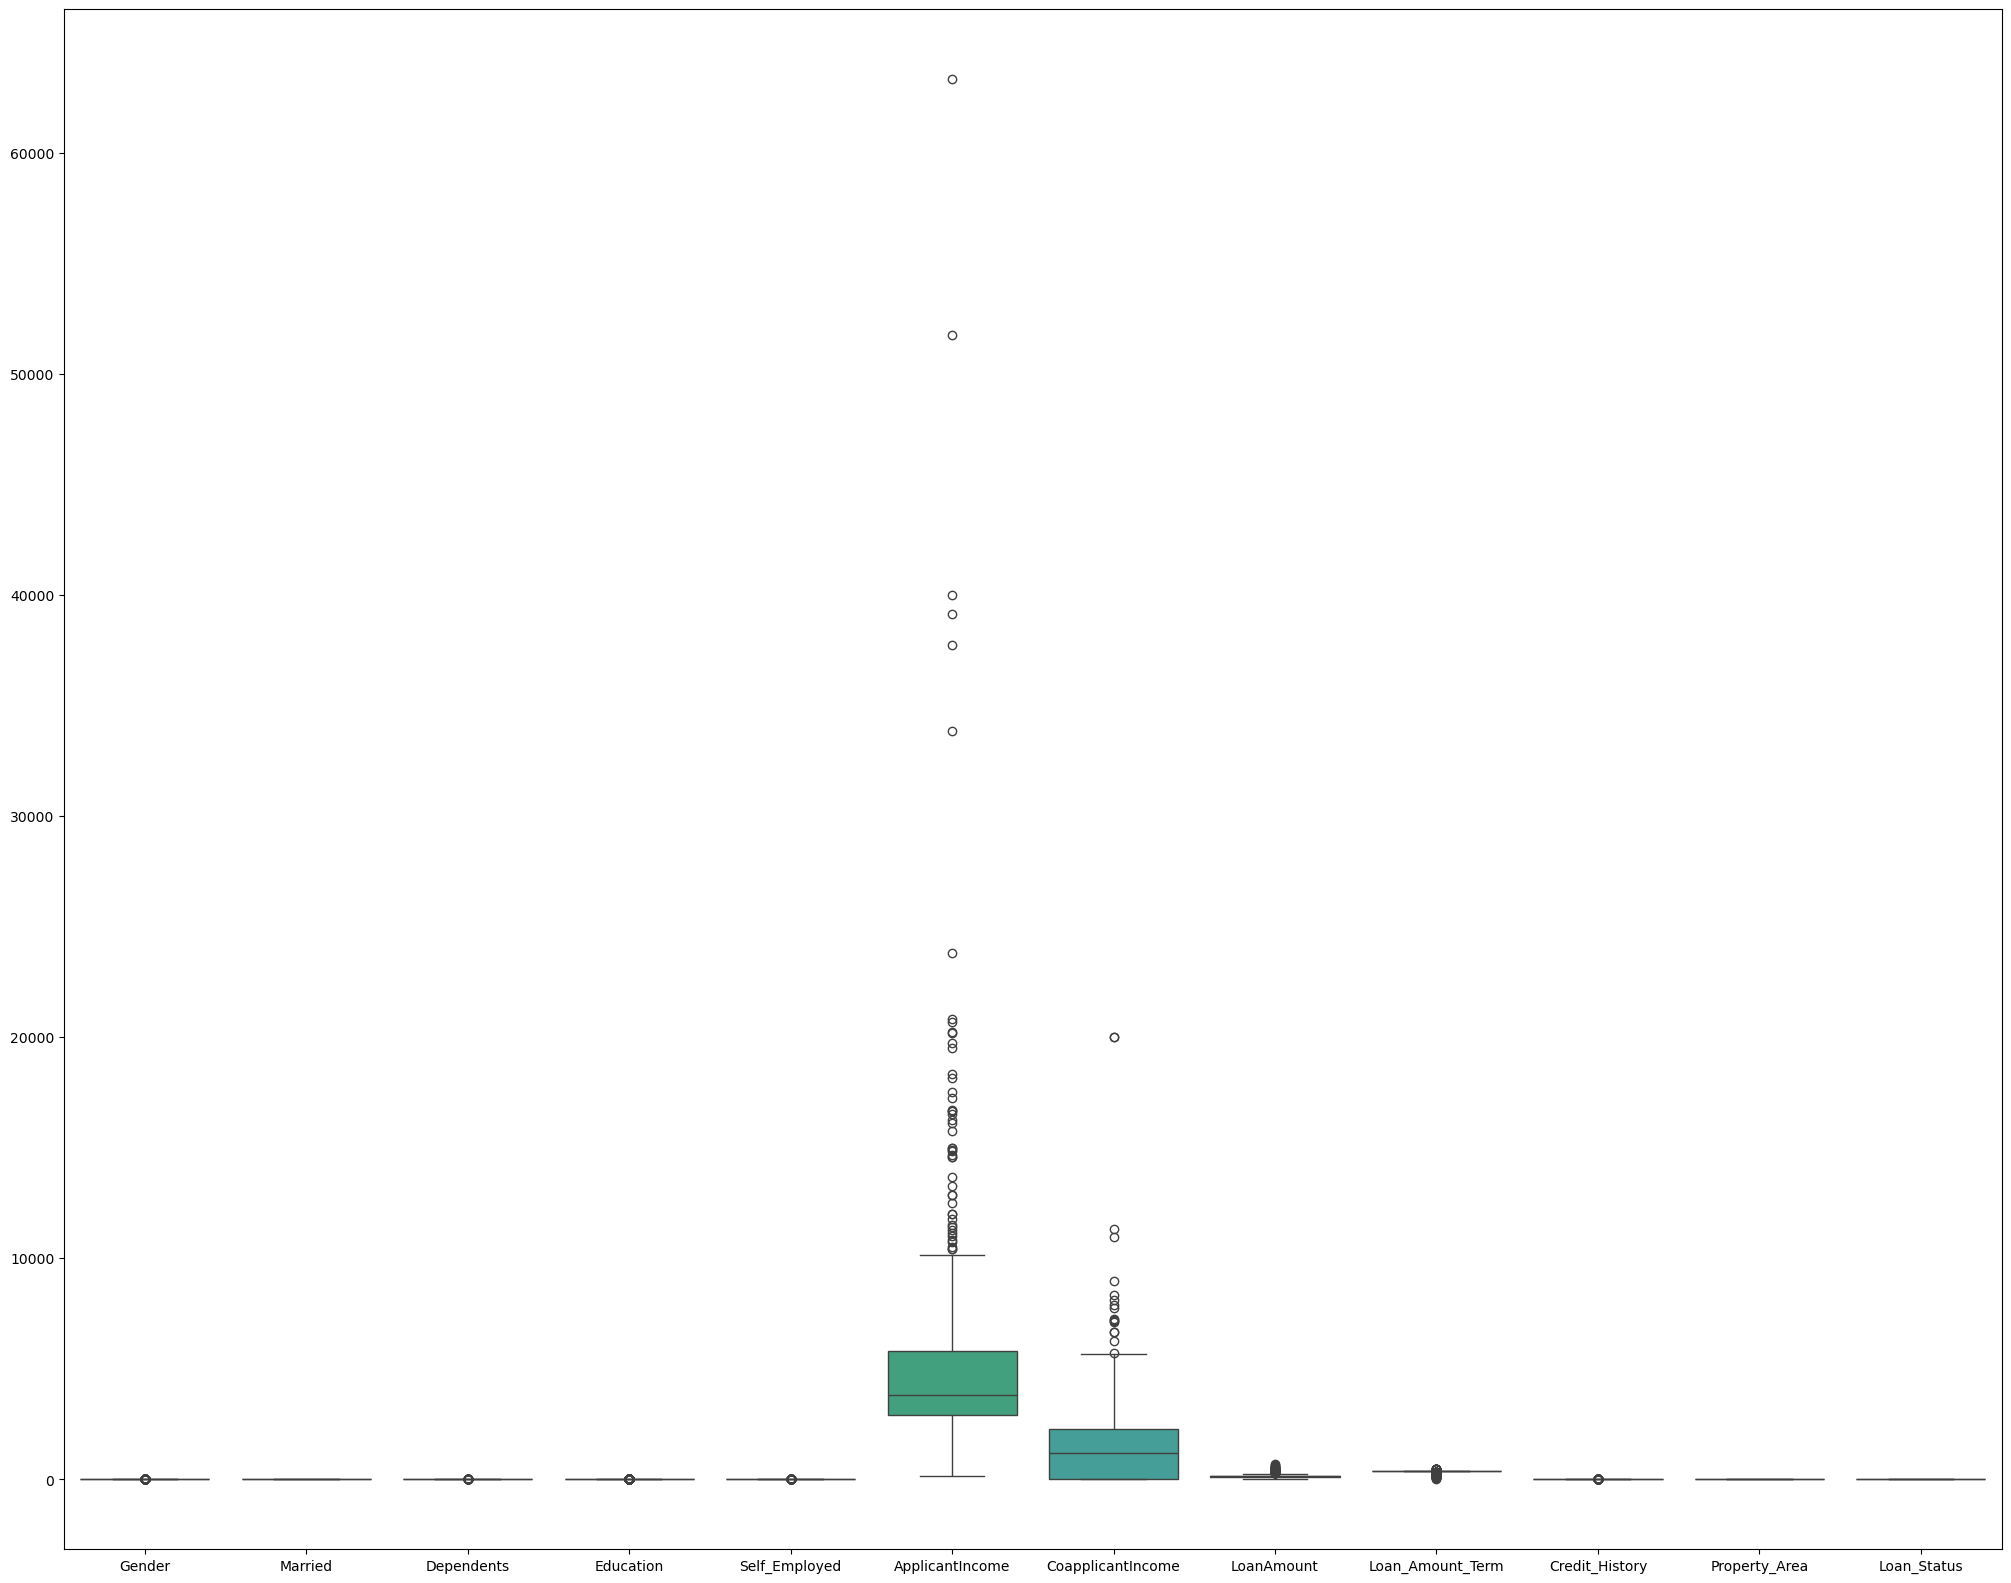

In [58]:
plt.figure(figsize=(25,20),facecolor='w')
sns.boxplot(data=X)

## 

## 

#### HISTOGRAM
HISTOGRM AFTER OUTLIERS REMOVED

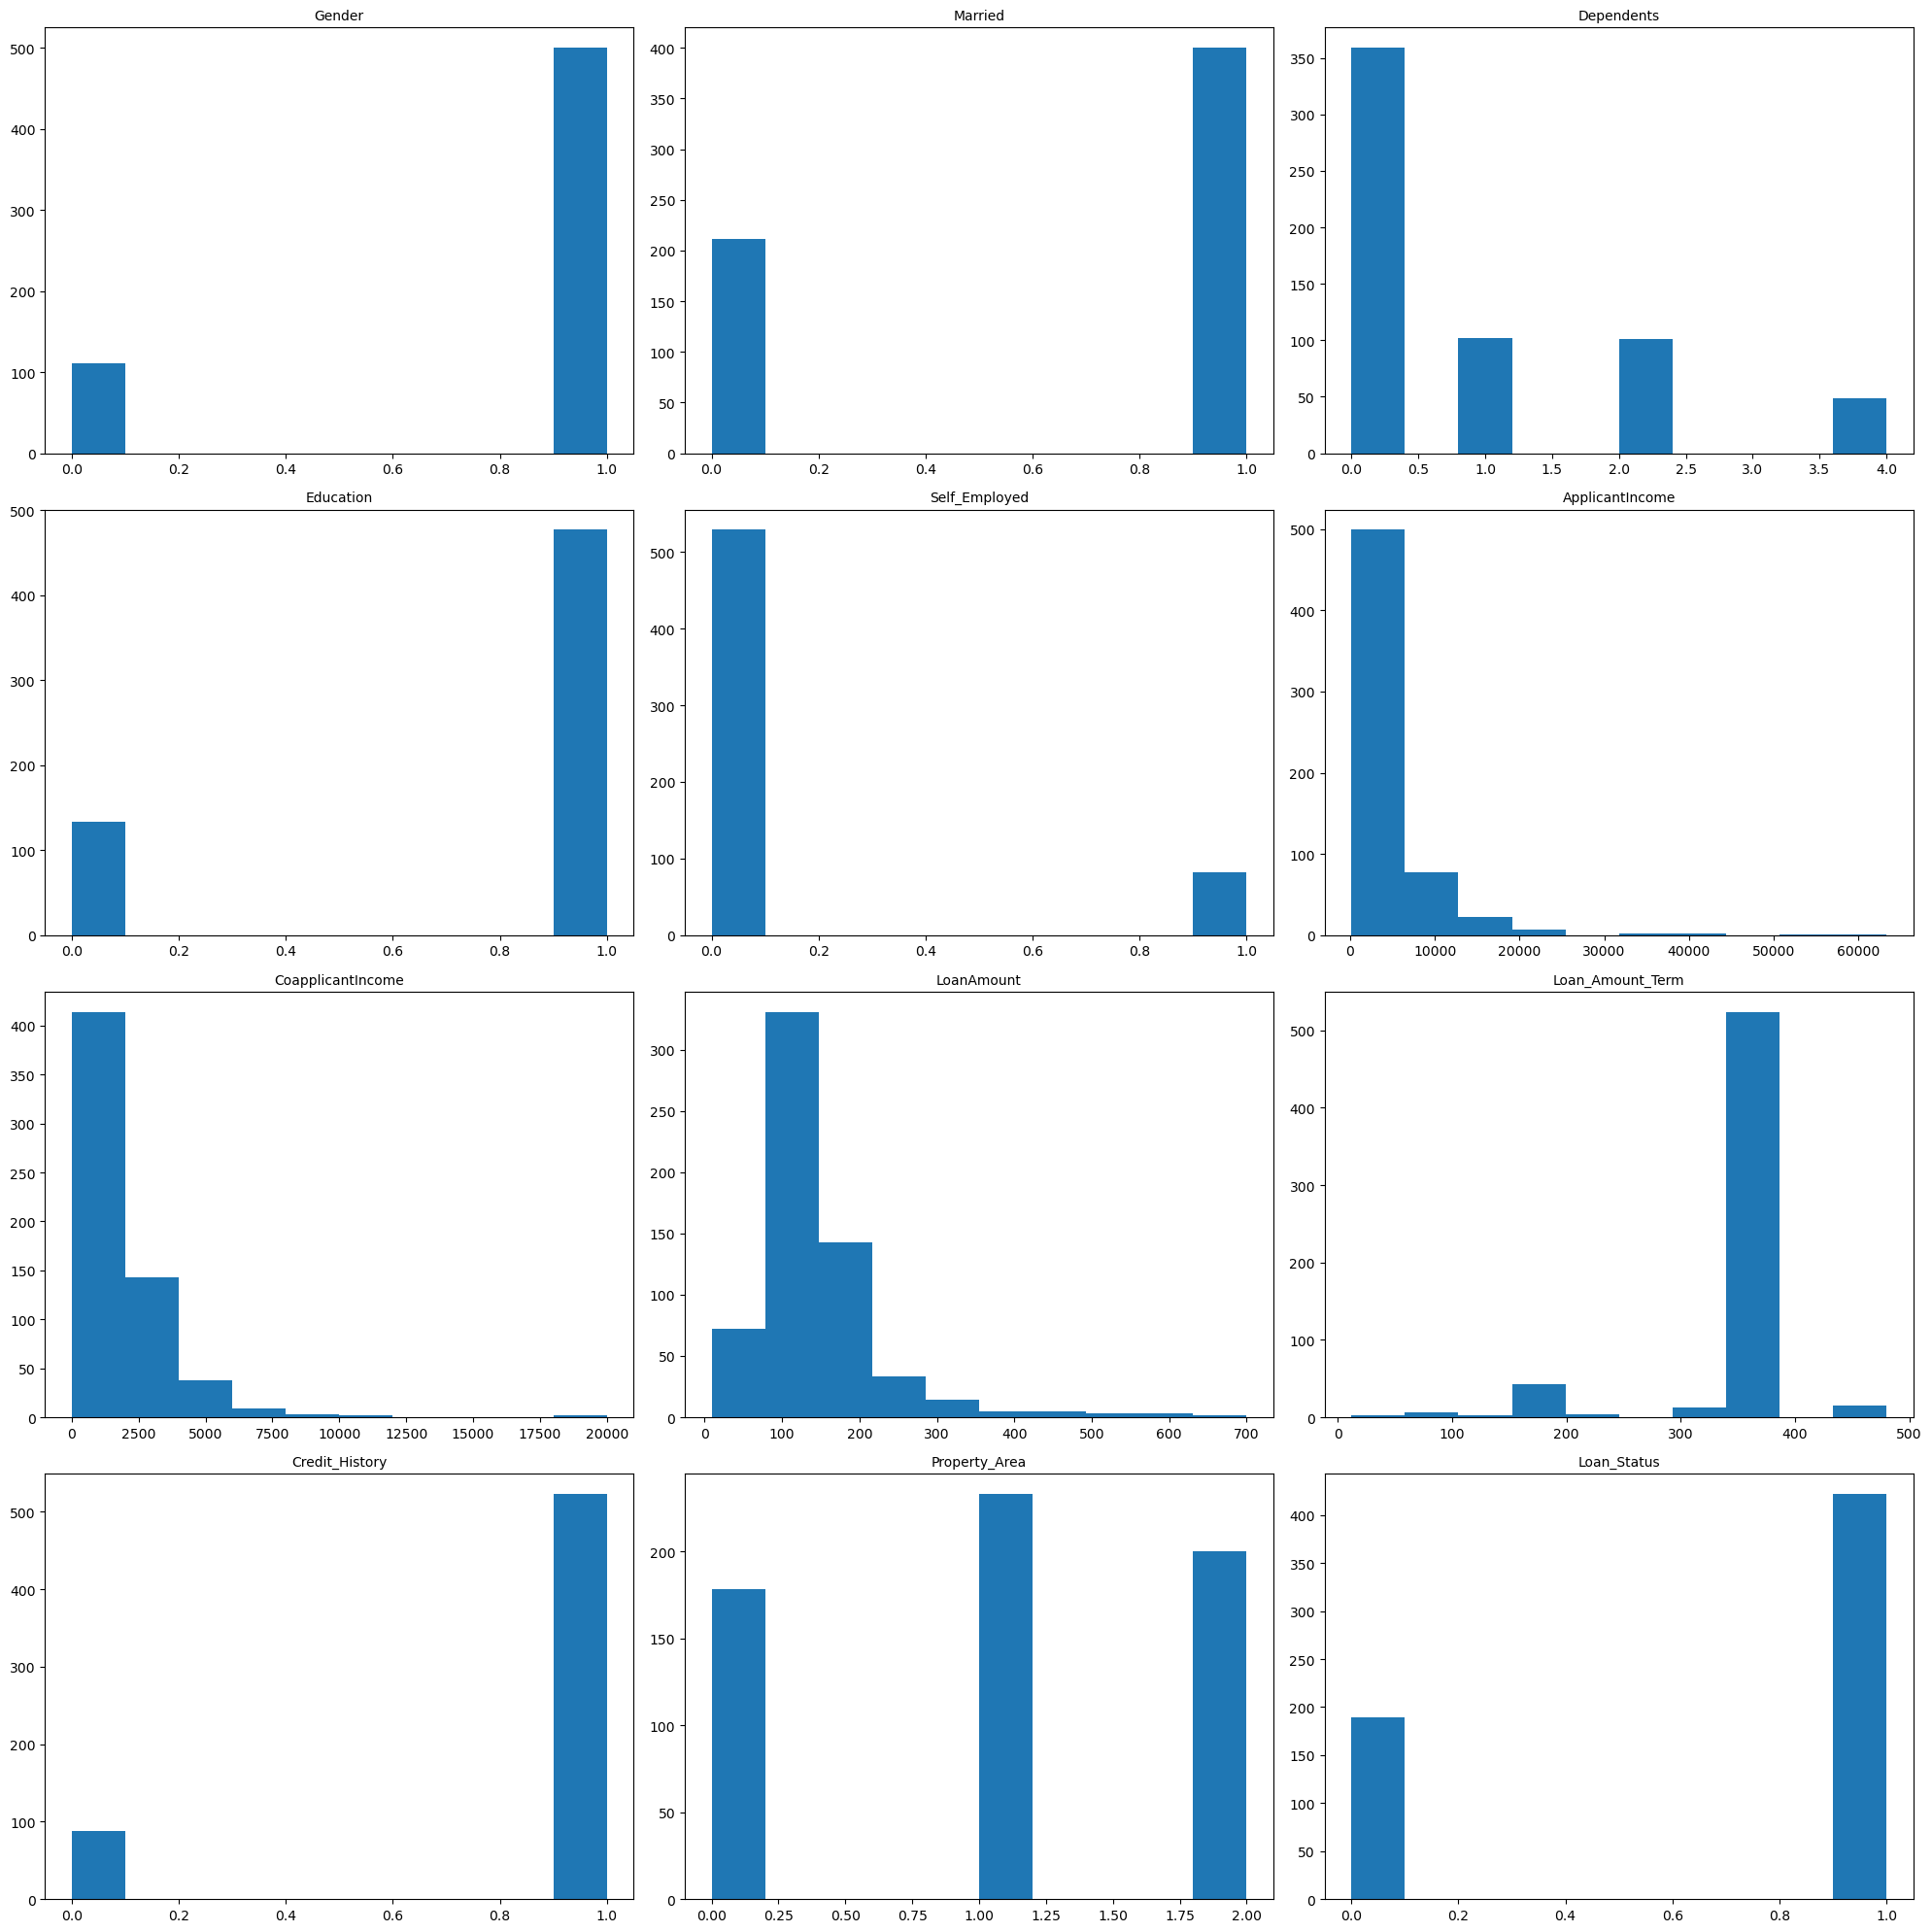

In [59]:
#histogram which is now little bit more normalized
plt.figure(figsize=(20,20))
for i,all in enumerate(X.columns):#for loop helps to go every feature in the cop dataframe
    #enumerate helps to count to every feature in same order as original datafrane and starts from 0
    plt.subplot(4,3,i+1)#subplot allows different features in single frame by dividing rows and column
    plt.hist(X[all], bins=10)#making histogram of each feature
    plt.title(all,fontsize=10)
plt.tight_layout()#it helps to give enough spaces good between all plot

## 

### CORRELATION BETWEEN FEATURES

In [60]:
val=X

In [61]:
#finding correaltion with numpy correcoef()
correlation = np.corrcoef(X['ApplicantIncome'], X['CoapplicantIncome'])[0, 1]
correlation#its almost 80 percent so we can remove the is smoking
#correaltion between diabetes and glucose

-0.12724072753296248

In [62]:
correlation2 = np.corrcoef(X['CoapplicantIncome'], X['LoanAmount'])[0, 1]
correlation2#very less correlation


0.21239669806679265

In [63]:
correlation3 = np.corrcoef(X['ApplicantIncome'], X['LoanAmount'])[0, 1]
correlation3#very less correlation


0.6037666253400781

In [64]:
    #finding correaltion with numpy correcoef()
correlation4 = np.corrcoef(X['ApplicantIncome'], X['Loan_Amount_Term'])[0, 1]
correlation4#its almost 80 percent so we can remove the is smoking
#correaltion between diabetes and glucose

-0.06266144580675367

In [65]:
correlation5 = np.corrcoef(X['CoapplicantIncome'], X['Loan_Amount_Term'])[0, 1]
correlation5#very less correlation


-0.011629280388916495

In [66]:
correlation2 = np.corrcoef(X['Loan_Amount_Term'], X['LoanAmount'])[0, 1]
correlation2#very less correlation


0.0486836642446105

#### What we know from here
applicant income and loan amount is strongly correlated

### 

### MAKING NEW FEATURE

### Domain knowledge
1. Applicant income:This is the income of the primary person applying for the loan. It is used to assess their ability to repay the loan.
2. Coapplicant Income: This is the income of the coapplicant, who is often a spouse, relative, or another person applying alongside the main applicant. This income is considered to evaluate the combined financial capability of the household or family to repay the loan.

3. They are both income . We can sum both to make new feature
4. Why?: It helps in Capture Interaction Effect , Reduce Multicollinearity and make the model to predict more effectively


### 

In [67]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [68]:
#making new feature total_income from 2 features applicant income and coapplicant income
X['Total_income']=X['ApplicantIncome']+X['CoapplicantIncome']

In [69]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


In [70]:
X['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    510
180.0     43
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

## 

### 

### 

### 

### 

## 3. EDA-Exploratory Data Analysis (EDA)

### 

In [71]:
X.shape

(611, 13)

### 

### HEATMAP OF X

In [72]:
plt.figure(figsize=(20,20))
#sns.heatmap(X,annot=True)
plt.show()

<Figure size 2000x2000 with 0 Axes>

## 

In [73]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


In [74]:
X['Dependents'].value_counts(normalize=True)

Dependents
0.0    0.587561
1.0    0.166939
2.0    0.165303
4.0    0.080196
Name: proportion, dtype: float64

## 

### 

### 

In [75]:
X.groupby('Gender').mean()#We can see data according to gender



,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
Gender,,,,,,,,,,,,
0.0,0.288288,0.369369,0.81982,0.135135,4681.558559,742.612613,125.218347,353.567568,0.846847,1.072072,0.675676,5424.171171
1.0,0.736000,0.918000,0.77200,0.134000,5429.638000,1675.021840,150.395662,339.684000,0.858000,1.028000,0.694000,7104.659840


### BARS ACCORDING TO THE MEAN OF EACH FEATURES ACCORDING TO GENDER

In [76]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


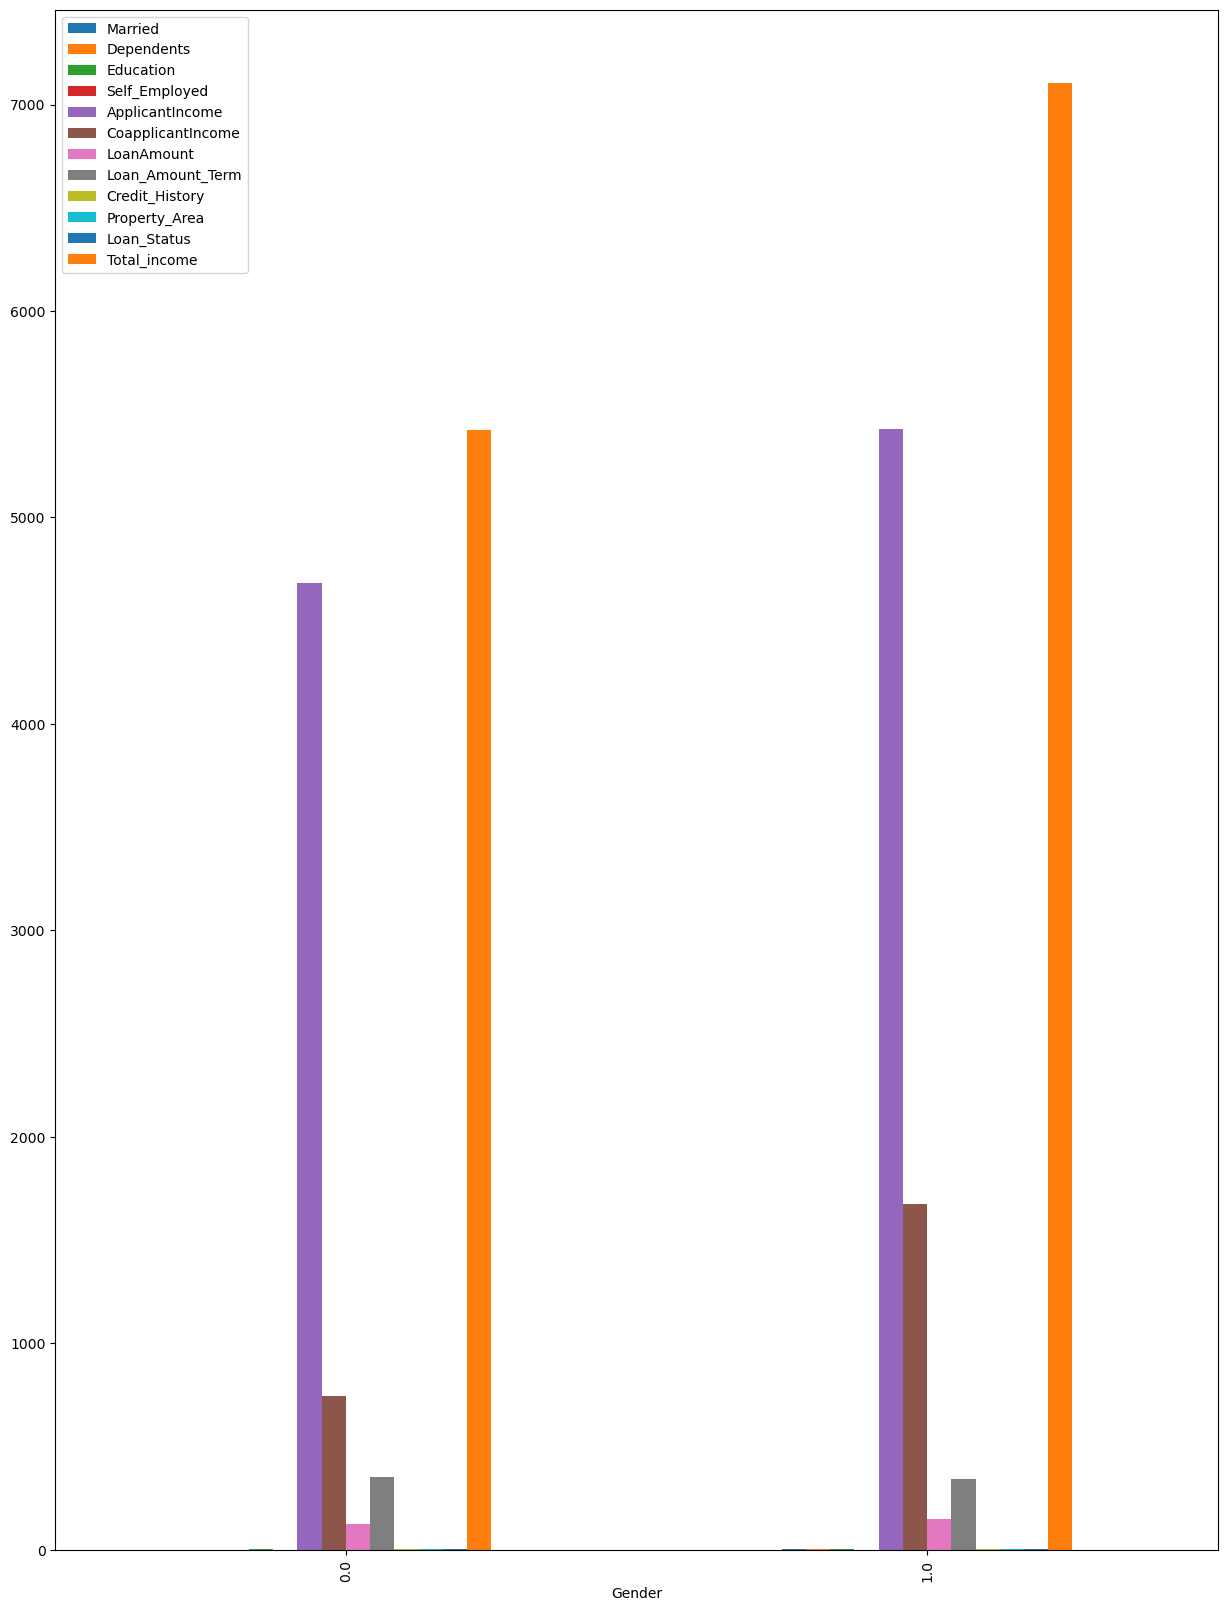

In [77]:
fig, ax = plt.subplots(figsize=(15, 20))
X.groupby('Gender').mean().plot(kind='bar',ax=ax)
plt.show()


### What we got to know:
1. Male are more married than female in the dataset
2. Male have more dependents
3. Both are almost equally self employed
4. Females are more educated
5. Male have more total income
6. Loan amount is got more by men
7. Loan amount term and credit history is alomost same
8. Property area is also almost some


## 

In [78]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


## 

## 

### Bar according to loan status

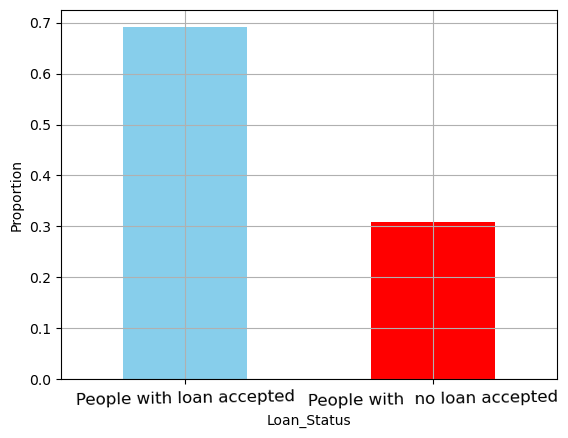

In [79]:

tyc=X['Loan_Status'].value_counts(normalize=True).plot(kind='bar',color=['skyblue','red'],
    grid=True )
tyc.set_xticklabels(['People with loan accepted','People with  no loan accepted'],rotation=True,fontsize=12)
plt.ylabel("Proportion")
plt.show()

### 

In [80]:
X['Loan_Status'].value_counts(normalize=True)

Loan_Status
1.0    0.690671
0.0    0.309329
Name: proportion, dtype: float64

## 

### From the Bar above we can conclude1. People with loan accepted is a lot more than by 3 times
2. Imbalance in data
3. Have to use technique like stratify or smote about 2

## 

### REGPLOT AND SCATTERPLOT

In [81]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


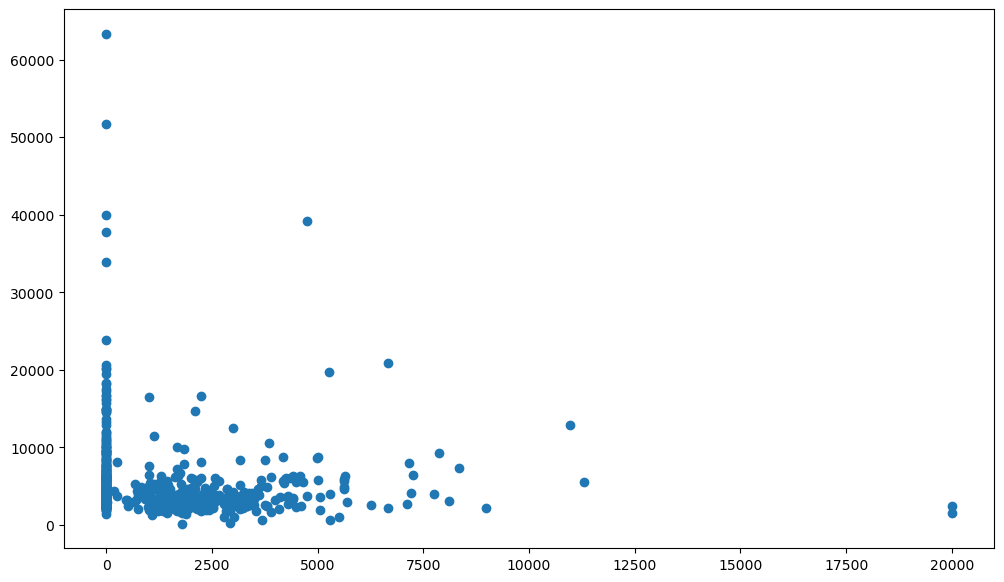

In [82]:

plt.figure(figsize=(12,7))
plt.scatter(data=X,y='ApplicantIncome',x='CoapplicantIncome')
plt.show()

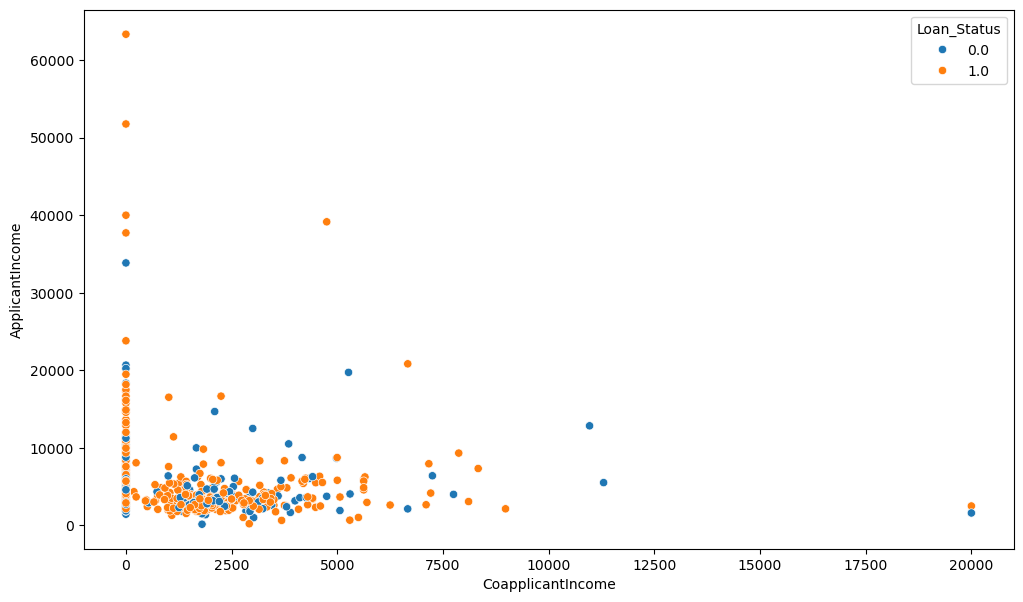

In [83]:
#With target variable
plt.figure(figsize=(12,7))
sns.scatterplot(data=X,y='ApplicantIncome',x='CoapplicantIncome',hue='Loan_Status')#hue categorize feature data form x and y
plt.show()

### 

In [84]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


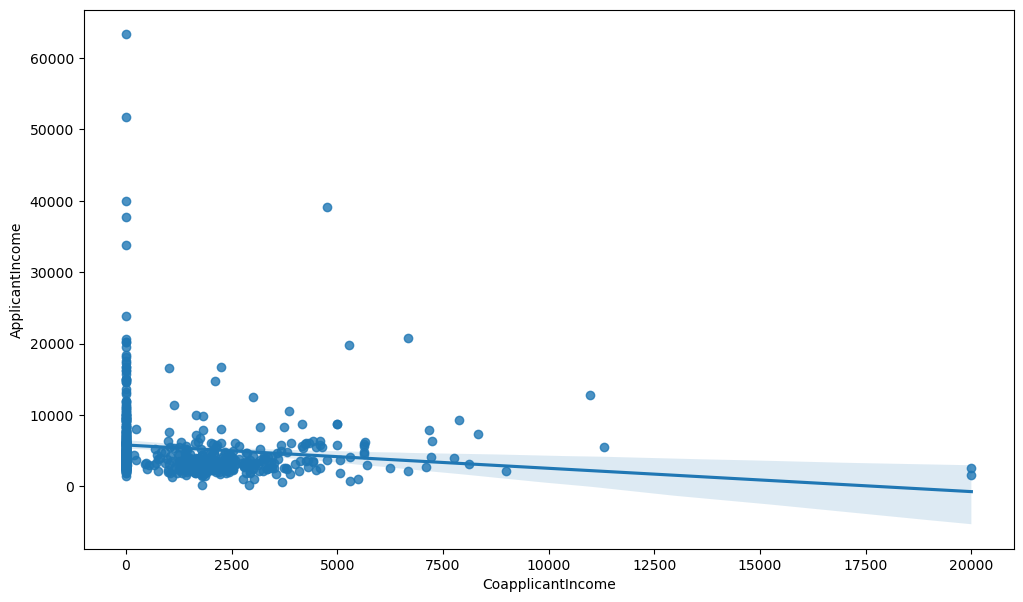

In [85]:

plt.figure(figsize=(12,7))
sns.regplot(data=X,y='ApplicantIncome',x='CoapplicantIncome')
plt.show()

#### Info: Not a very good linear correlation

### 

### Scatterplot and regplot between applicantincome and loan amount

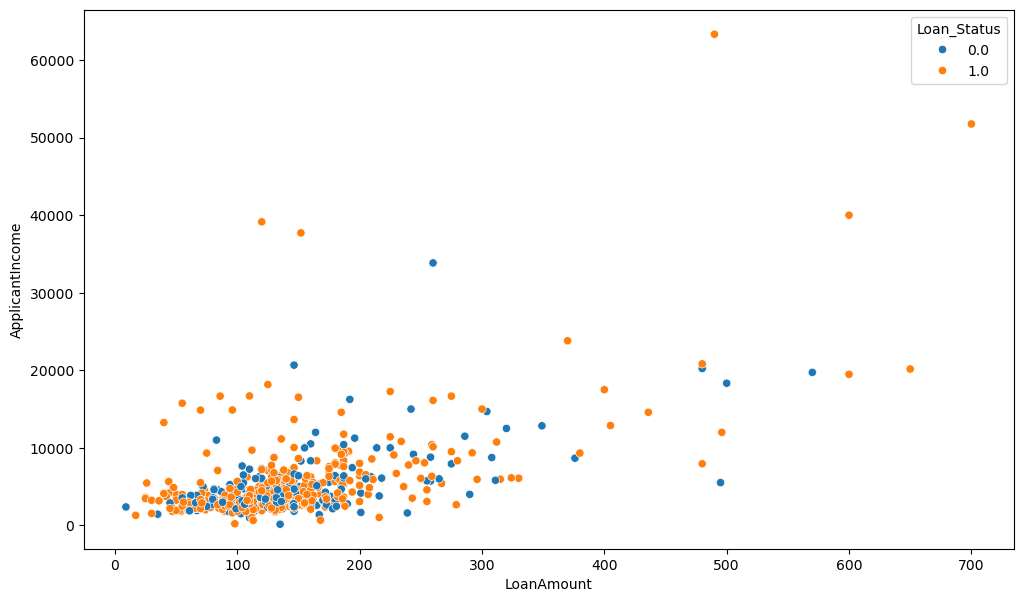

In [86]:

plt.figure(figsize=(12,7))
sns.scatterplot(data=X,y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')
plt.show()

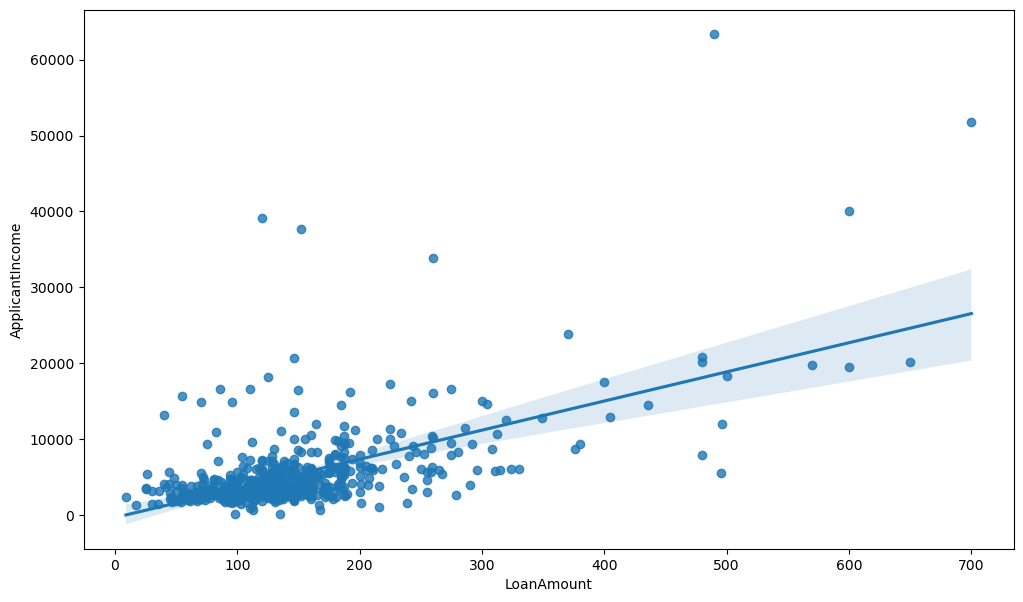

In [87]:

plt.figure(figsize=(12,7))
sns.regplot(data=X,y='ApplicantIncome',x='LoanAmount')
plt.show()

### Info:
1. Positive correaltion between applicant income and loan amount

## 

### Scatter plot and regplot between applicant income and loan amount term 

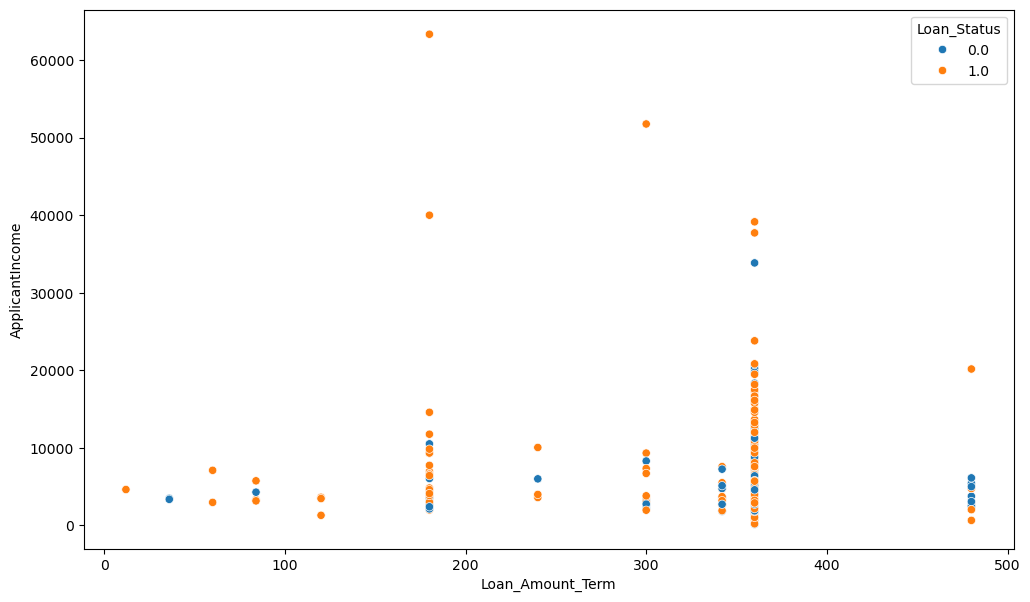

In [88]:

plt.figure(figsize=(12,7))
sns.scatterplot(data=X,y='ApplicantIncome',x='Loan_Amount_Term',hue='Loan_Status')#hue categorize the feature according to x and y
plt.show()

### 

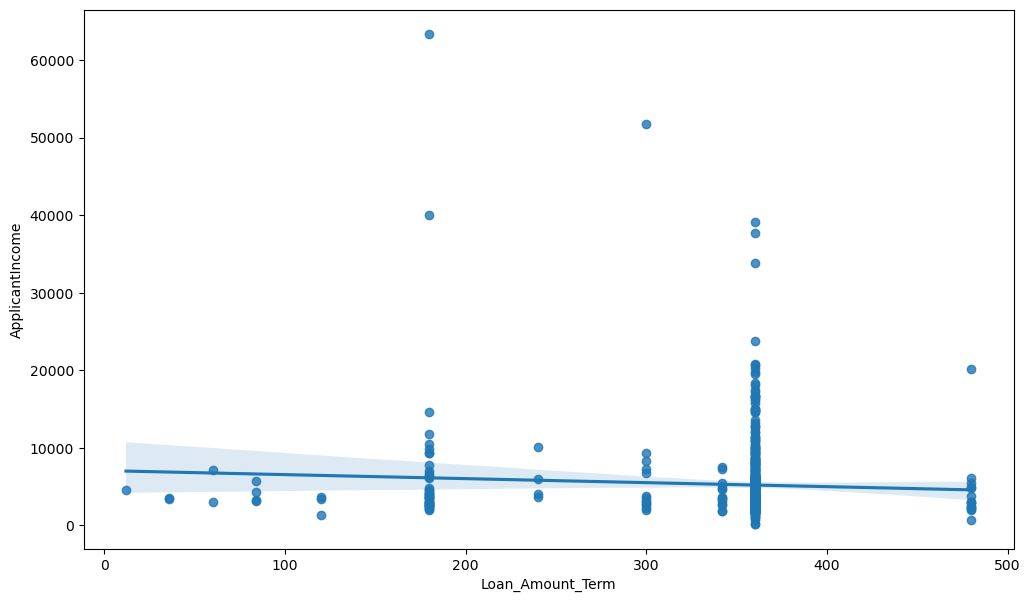

In [89]:

plt.figure(figsize=(12,7))
sns.regplot(data=X,y='ApplicantIncome',x='Loan_Amount_Term')
plt.show()

### info:
NO linear correlation between loan amount term and applicant income

### 

### DIVIDING TO CATEGORICAL AND CONTINOUS FEATUREAS

In [90]:
X.nunique().sort_values()#display all unique values of each features

Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
Property_Area          3
Dependents             4
Loan_Amount_Term      11
LoanAmount           202
CoapplicantIncome    285
ApplicantIncome      502
Total_income         551
dtype: int64

In [91]:
type(X.nunique().sort_values())

pandas.core.series.Series

## 

### List of categorical features

In [92]:
#list comprehension to get  feature with unique values less than 5 which will be categorical value
filter_cat=[m for m in X.nunique().index if (X.nunique())[m]<5]

In [93]:
filter_cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

### Catplot for categorical data

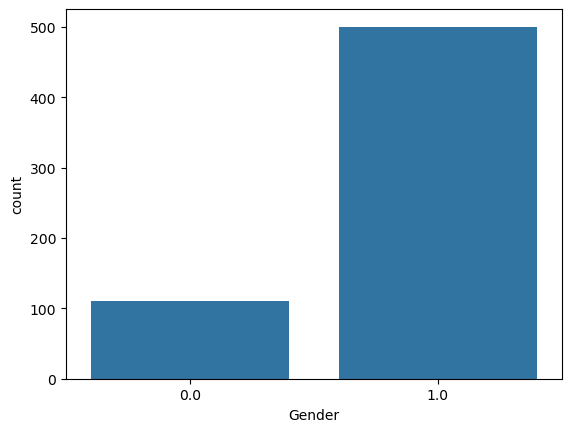

In [94]:
#countplot is for categorical value for bar
sns.countplot(data=X,x='Gender')
plt.show()

## 

## 

### Categorical value bars according to the unique data

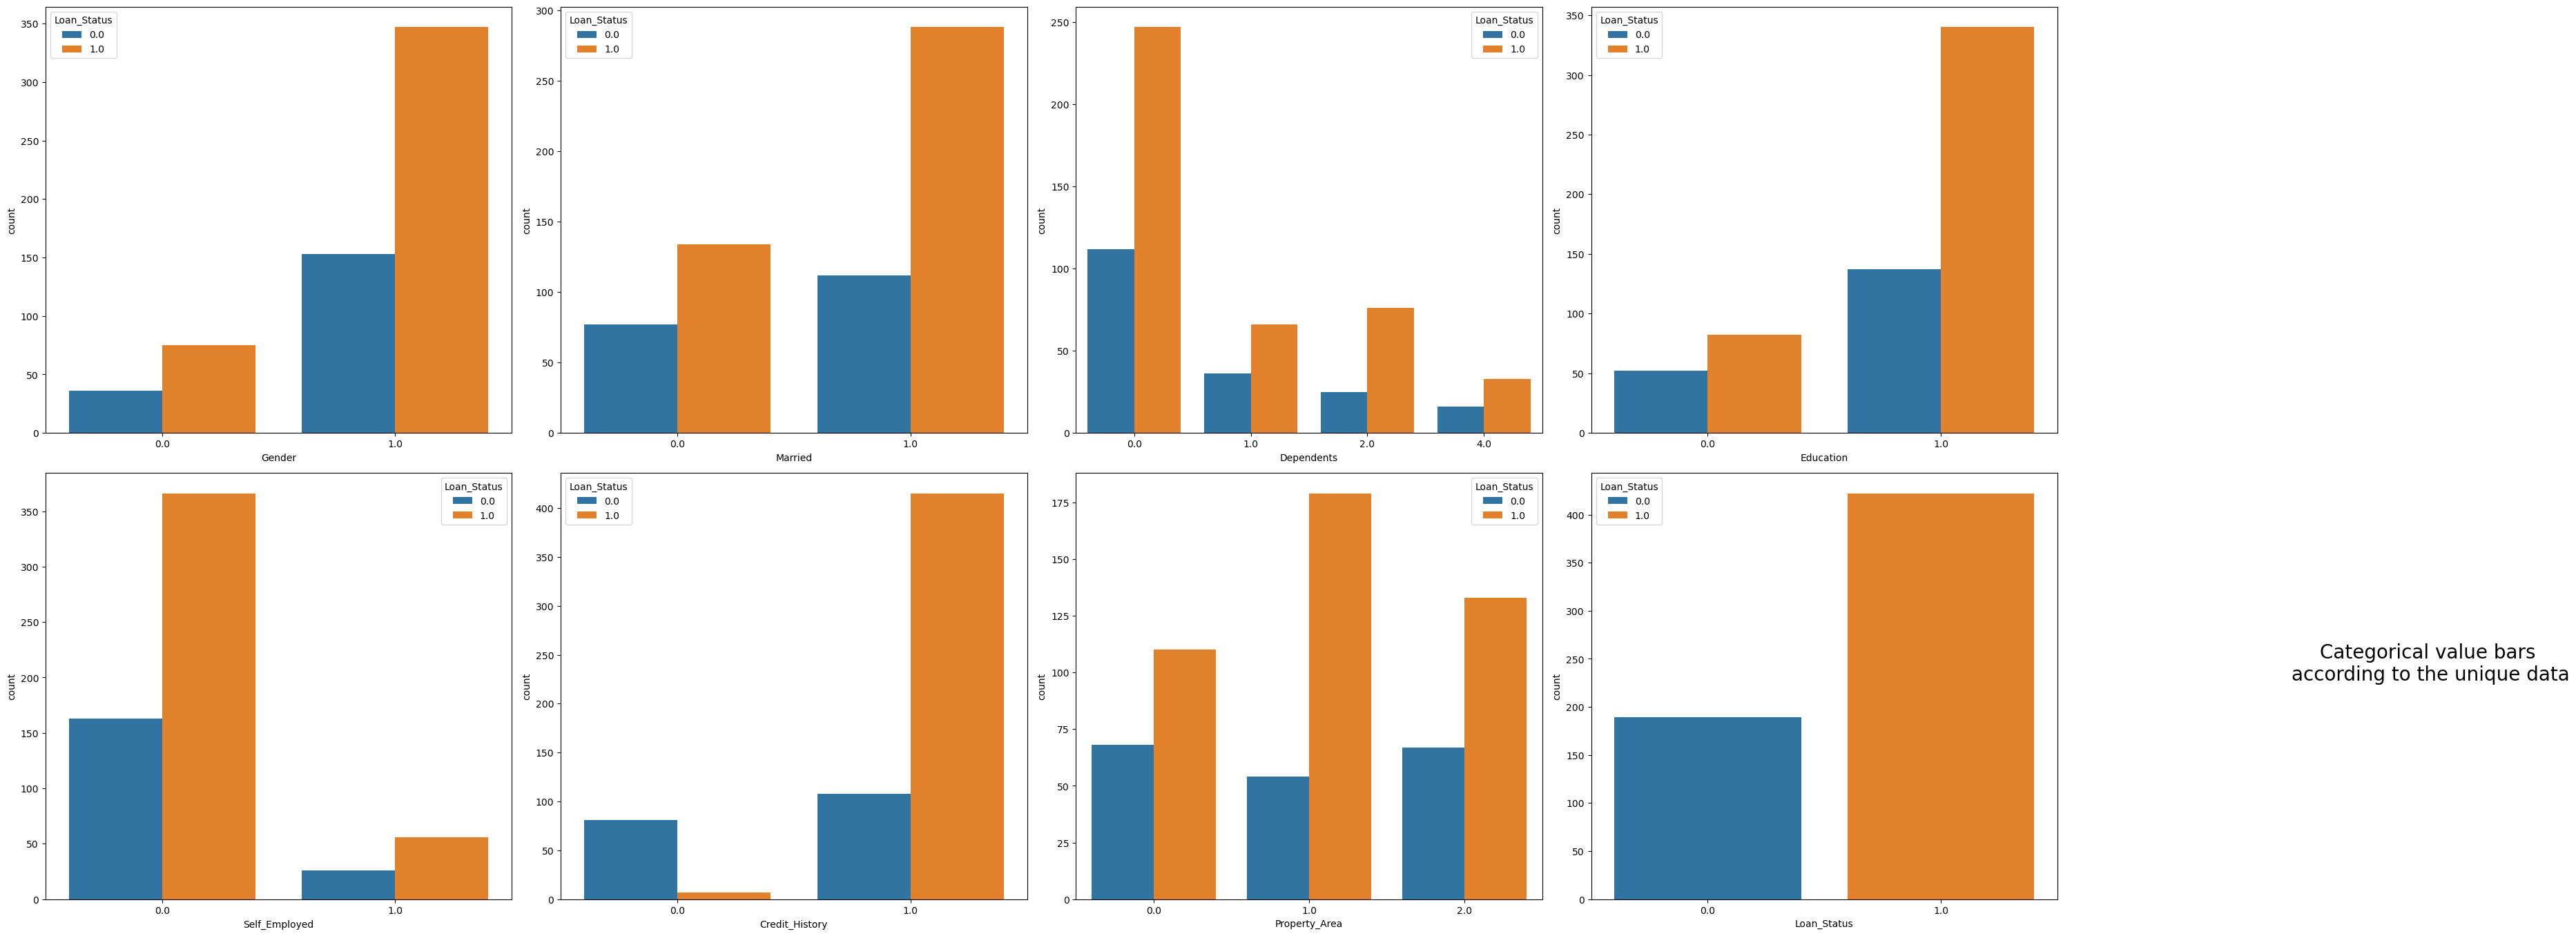

In [95]:
plt.figure(figsize=(30,20))
for i,value in enumerate(filter_cat):
    plt.subplot(3,4,i+1)
    sns.countplot(data=X,x=value,hue='Loan_Status')
plt.tight_layout()
plt.title("Categorical value bars \naccording to the unique data",x=1.8,y=0.5,fontsize=20)
plt.show()

### From these bars we can see which categorical data are more prone to output

### Note:
1. Both genders have same possiblity of acceptance of loan and decline
2. Unmarried gets more percentage of loan approval
3. With 0 dependents , people got more approval
4. Self employed people are less but got more percentage of approval
5. People with credit history got more approval
6. People with urban property area got more loans approval

### For  continous values

In [96]:
#list with continous features to find correaltion among them
filter_con=[m for m in X.nunique().index if (X.nunique())[m]>5]
filter_con


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Total_income']

In [97]:
#making continous dataframe by remving categorical features
continous=X.drop(filter_cat,axis=1)
continous.isnull().sum()


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Total_income         0
dtype: int64

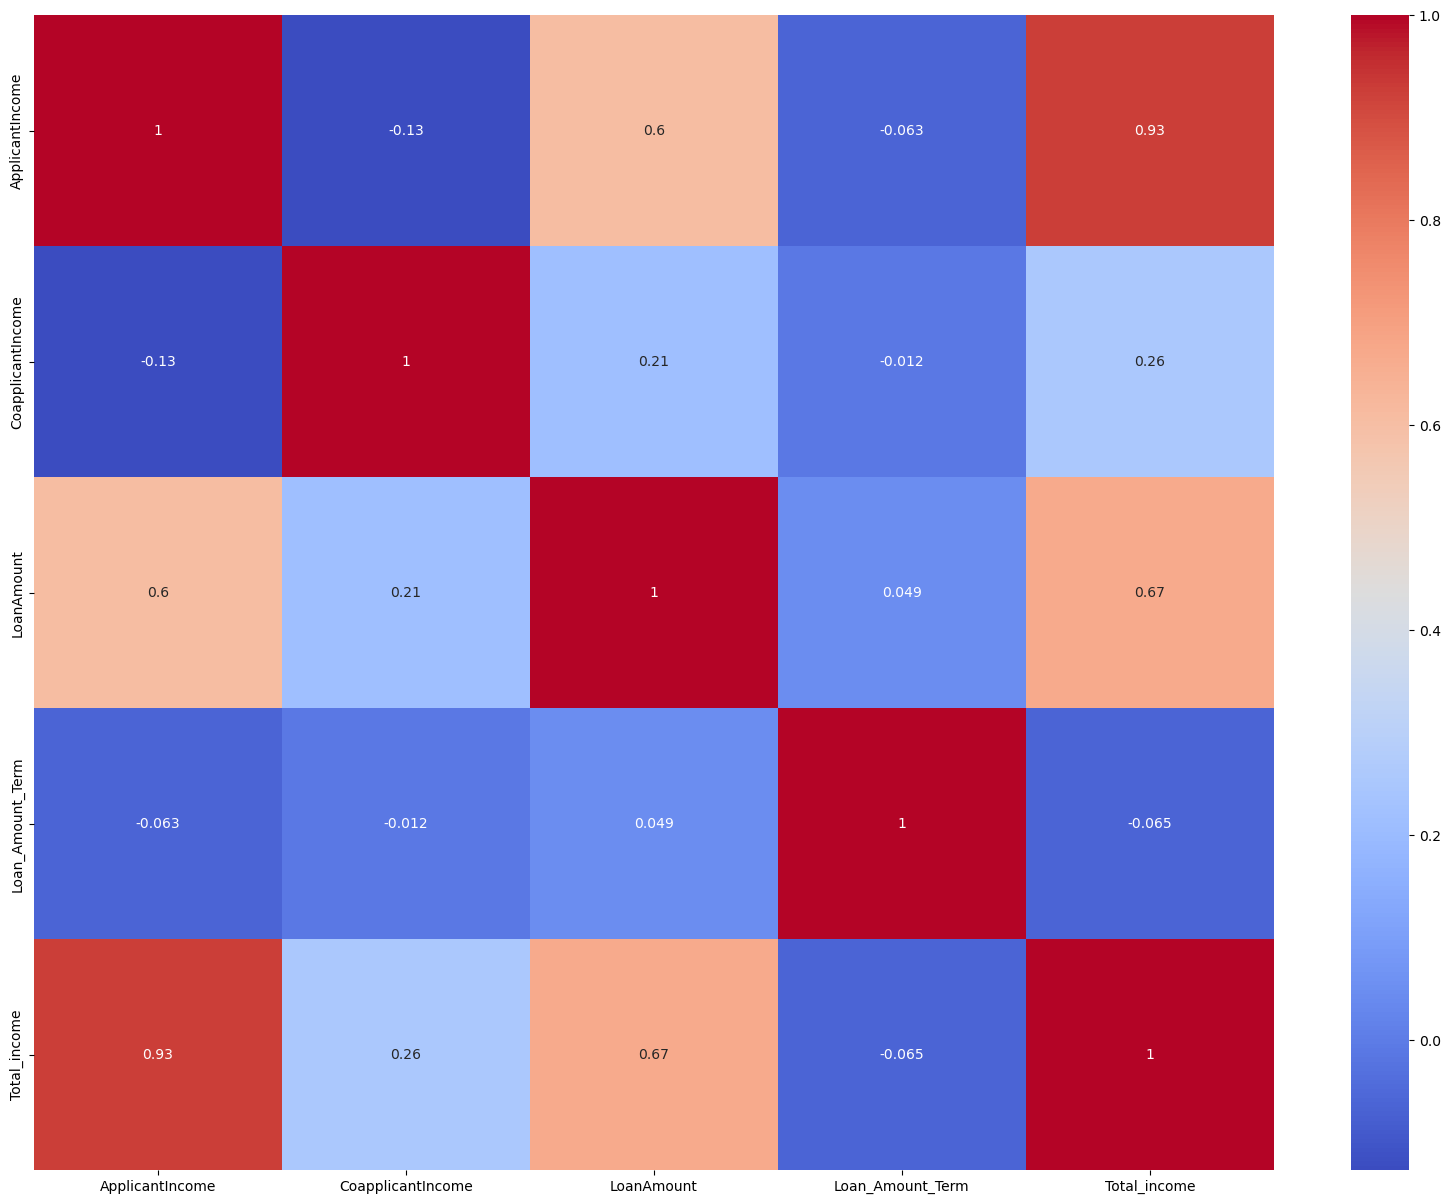

In [98]:
#calculate correlation of continous dataframe
cor=continous.corr()
plt.figure(figsize=(20,15))
#heatmap of correlation matrix
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

### 

### 

### Boxplot of all features

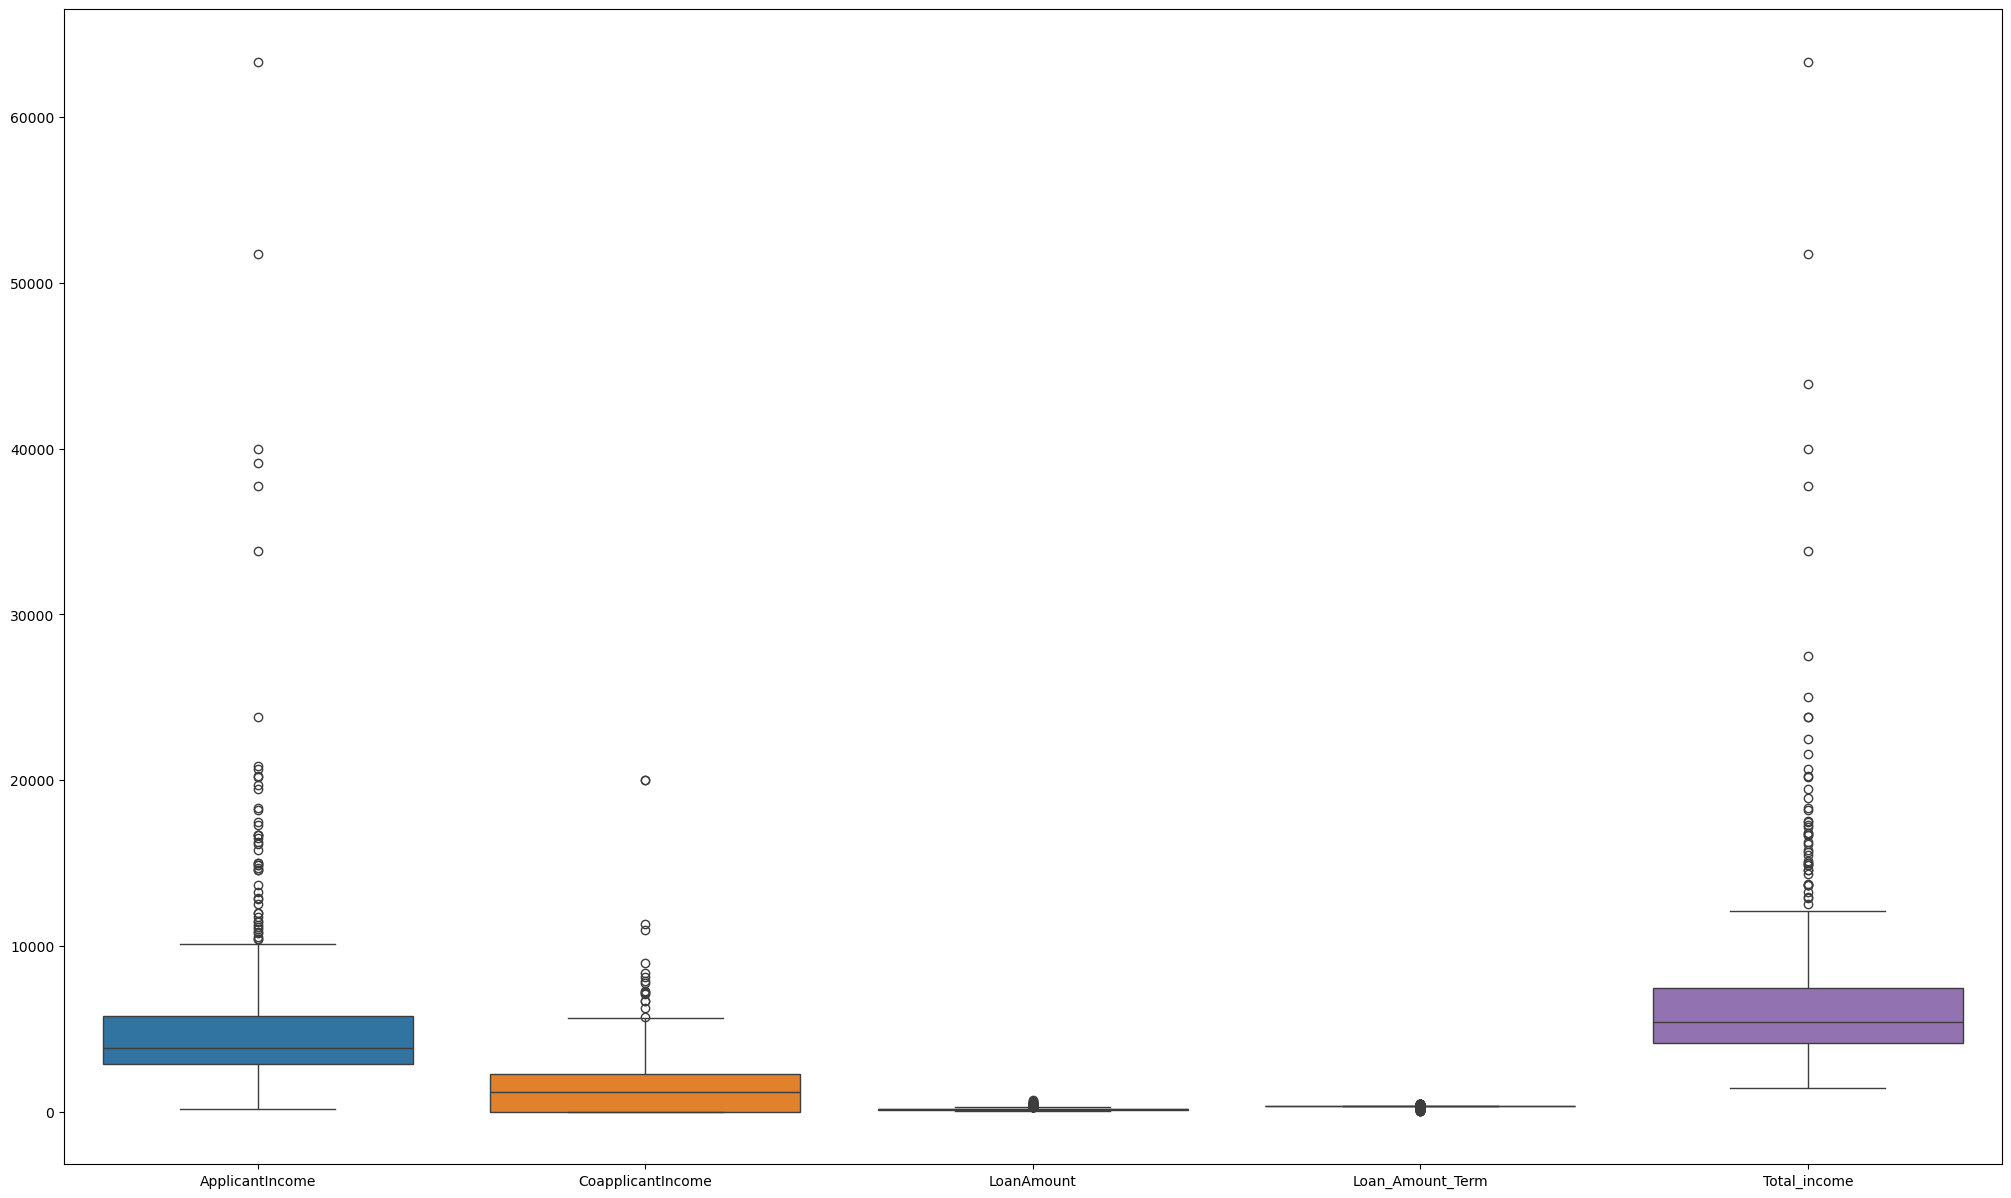

In [99]:
plt.figure(figsize=(25,15))
sns.boxplot(continous)
plt.show()

### 

In [100]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


### Hisplot of gender and dependetns with output

C:\Users\LENOVO\anaconda3\envs\nick\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1200 with 0 Axes>

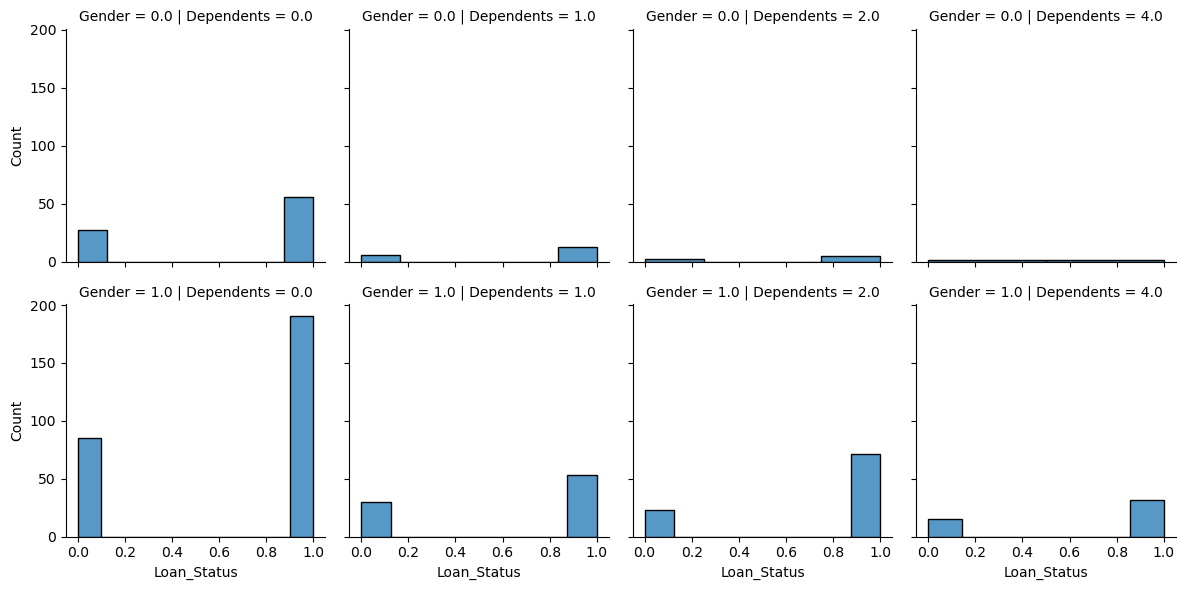

In [101]:
plt.figure(figsize=(25,12))
g=sns.FacetGrid(X,row='Gender',col='Dependents')
g.map(sns.histplot,"Loan_Status")
#It shows different data with different gender and dependents and their bar of approval of loan or not
plt.show()

#### info:

Less dependents leads to more Loan_status

### 

### 

In [102]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,LP002979,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,LP002983,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,LP002984,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [103]:


X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


### 

### 

## 4. FEATURE SELECTION

### 1.varaince threshold
It detect the feature which has lower variance than threshold

In [104]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


In [105]:
filter_con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Total_income']

## 

In [106]:
from sklearn.feature_selection import VarianceThreshold

vt=VarianceThreshold(threshold=0.02)#threshold check if the variance is in this range if yes we can remove it because there is no use of that feature

vt.fit(X)

vt.get_support()

#get_support() shows in boolean form for all columns true or false
yr=X.columns[vt.get_support()]

#This list shows the columns which cant cross the threshold
const=[column for column in X.columns if column not in yr]

const

[]

### Result
No feature found with low variance

### 

## 

### Correlation analysis
Pearson correlation :We can remove one feature among very 2 correlated features

In [107]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = X.corr()
#sns.heatmap(X, annot=True, cmap='coolwarm')
plt.show()

<Figure size 2500x1000 with 0 Axes>

## 

### FUNCTION TO FIND FEATURE WITH HIGHLY CORRELATED

In [108]:
def corre(dataset,threshold):
    col_corr={}#empty dict to add the feature 
    corr=dataset.corr()#finds correaltion of the data set
    for i in range(len(corr.columns)):#goes to every columns of the correlation 
        for j in range((i)):#will access previous value than i
            if abs(corr.iloc[i,j])>threshold:#checks if the correlation on present and previous column correlation is above threshold
                
                coli=corr.columns[i]#store present feature nane
                colj=corr.columns[j]#store previous feature name
                key=tuple(sorted((coli,colj)))#sort them  and store in a tuple so no repeation allowed
                col_corr[key]=corr.iloc[i,j]#adds feature names to dict
    return col_corr
z=corre(X,0.75)#applying feature with threshold 0.75
print(z)

{('ApplicantIncome', 'Total_income'): 0.9263965540336793}


In [109]:
Y=X['Loan_Status']
X=X.drop('Loan_Status',axis=1)

### Note:
Applicant income and total income are highly correalted so we can remove it later

## 

In [110]:
Y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 611, dtype: float64

## 

#### SELECT K BEST FEATURE SELECTION

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif


feature_names = loan_dataset.columns
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, Y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

# Get selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Selected feature names:", selected_feature_names)

# Print the scores for all features to understand why they were selected
scores = selector.scores_
print("Feature scores:", scores)


Selected feature indices: [3 9]
Selected feature names: ['Dependents', 'Loan_Amount_Term']
Feature scores: [1.42329016e-01 4.68407831e+00 1.15260187e-01 5.00443064e+00
 2.65006095e-02 3.96323503e-01 3.97923799e-04 4.25066202e-01
 4.12126767e-01 2.53773994e+02 7.54420373e-01 3.67267516e-01]


### INFO:
DEPENDENTS AND LOAN AMOUNT TERM ARE SELECTED FEATURES 

### 

## 

## 

### Backward Elimination

In [112]:
from sklearn.feature_selection import SequentialFeatureSelector#sequential feature selection
from sklearn.linear_model import LogisticRegression#from logistic regression


# Apply Backward Elimination
sfs = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=2, direction='backward')
X_new = sfs.fit_transform(X, Y)

selected_features = sfs.get_support(indices=True)
print("Selected feature indices:", selected_features)


C:\Users\LENOVO\anaconda3\envs\nick\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\envs\nick\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Selected feature indices: [ 9 11]


#### THIS SUGGEST 9 AND 11 WHICH ARE SELECTED FEATIRES WHICH ARE LOAN AMOUNT TERM AND TOTAL INCOME

## 

## 

### CONCLUSTION
So 9 Loan amount term is important feature among all

## 

In [113]:
continous=pd.DataFrame([])#DATAFRAME for the continous value
for i in filter_con:
    continous[i]=X[i]#adding all column of dataframe X which are in filer_con list   

In [114]:
continous#dataframe of continous values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_income
0,5849.0,0.0,146.412162,360.0,5849.0
1,4583.0,1508.0,128.000000,360.0,6091.0
2,3000.0,0.0,66.000000,360.0,3000.0
3,2583.0,2358.0,120.000000,360.0,4941.0
4,6000.0,0.0,141.000000,360.0,6000.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,2900.0
610,4106.0,0.0,40.000000,180.0,4106.0
611,8072.0,240.0,253.000000,360.0,8312.0
612,7583.0,0.0,187.000000,360.0,7583.0


## 

## 

In [115]:
val

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0,7583.0


## 

### CORRELATION BAR DIAGRAM WITH OUTPUT

In [116]:
correlations = val.corrwith(val['Loan_Status'])#correaltion fo all features of val with output

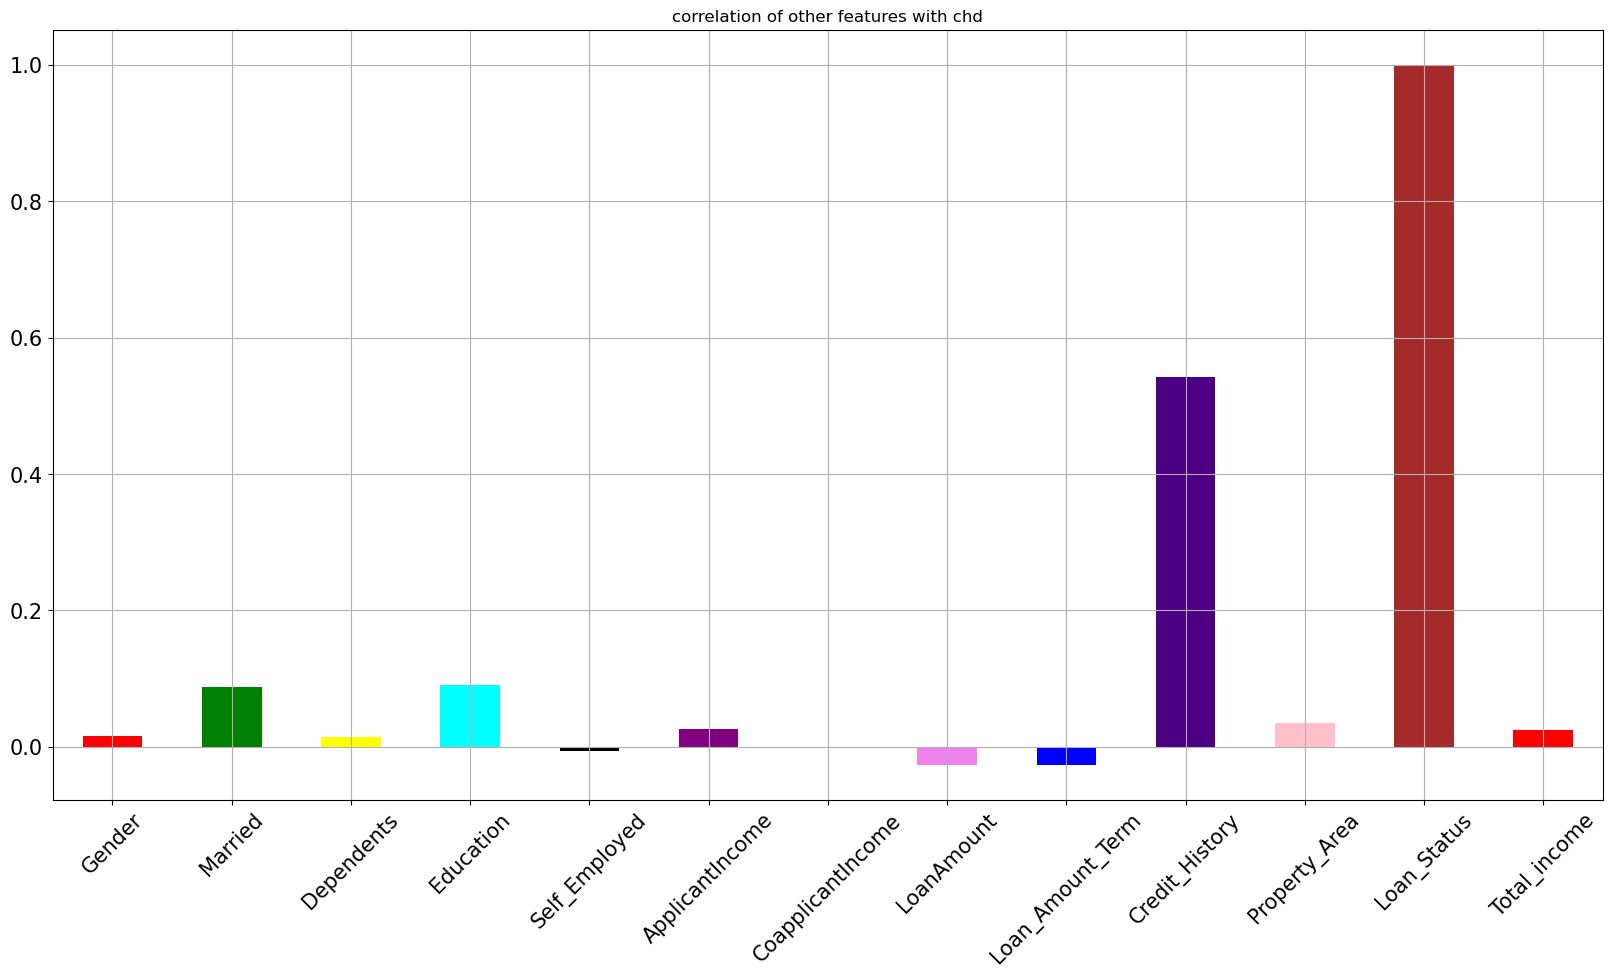

In [117]:

c=['red','green','yellow','cyan','black','purple','grey','violet','blue','indigo','pink','brown']#adding colors
correlations.plot.bar(figsize=(20,10),title="correlation of other features with chd",fontsize=15,rot=45,grid=True,color=c)#plot bars for the corelation of all features with output
plt.show()

### Note
1. For output loan status more which is already calculated from feature selection.
2. Then Credit history contribute
3. Self_employed is least contributiing and gender too
4. So we can think of removing it later

## 

## 

## 

In [118]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,7583.0


## 

In [119]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,7583.0


## 

## 

### FEATURE REMOVAL AFTER TESTINGS

In [120]:
X=X.drop(['ApplicantIncome'],axis=1)#dropping non valuebale coumns

In [121]:
X=X.drop(['CoapplicantIncome'],axis=1)

In [122]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1.0,0.0,0.0,1.0,0.0,146.412162,360.0,1.0,2.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,128.000000,360.0,1.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,66.000000,360.0,1.0,2.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,120.000000,360.0,1.0,2.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,141.000000,360.0,1.0,2.0,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,71.000000,360.0,1.0,0.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,40.000000,180.0,1.0,0.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,253.000000,360.0,1.0,2.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,187.000000,360.0,1.0,2.0,7583.0


### 5.	Model Development

In [123]:
#splitting dataset to train and test with test size 0.2 and random state 42 and used stratify to make data balanced
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)


### BALACING THE TRAIN AND TEST  OF X WITH STRATIFY 

In [124]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
27,1.0,1.0,2.0,0.0,0.0,110.0,360.0,1.0,2.0,5266.0
61,1.0,1.0,4.0,1.0,0.0,99.0,360.0,1.0,2.0,3029.0
421,0.0,0.0,0.0,0.0,0.0,80.0,342.0,0.0,2.0,2720.0
106,1.0,1.0,2.0,1.0,0.0,225.0,360.0,1.0,2.0,12543.0
491,1.0,1.0,1.0,0.0,0.0,186.0,360.0,1.0,2.0,6464.0
...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.0,0.0,1.0,0.0,210.0,360.0,1.0,2.0,8566.0
313,1.0,1.0,2.0,1.0,1.0,144.0,84.0,1.0,0.0,5746.0
498,1.0,1.0,1.0,1.0,1.0,95.0,360.0,1.0,1.0,2895.0
144,1.0,1.0,2.0,1.0,0.0,187.0,180.0,1.0,2.0,11757.0


### CHECKING DATA PATERN IN BOTH SPLIT

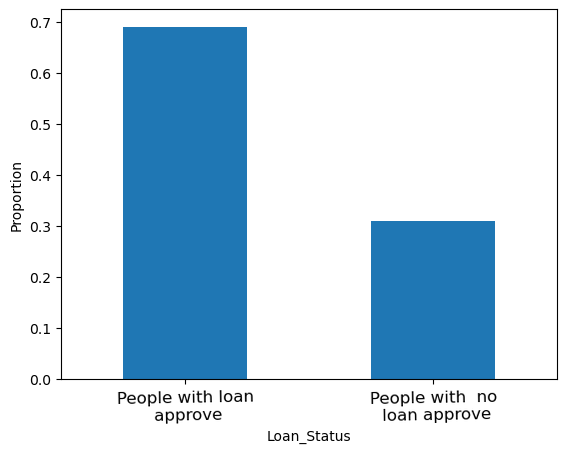

In [125]:
tyc=y_train.value_counts(normalize=True).plot(kind='bar')#bar on value count of output
tyc.set_xticklabels(['People with loan\n approve','People with  no\n loan approve'],rotation=True,fontsize=12)
plt.ylabel("Proportion")
plt.show()

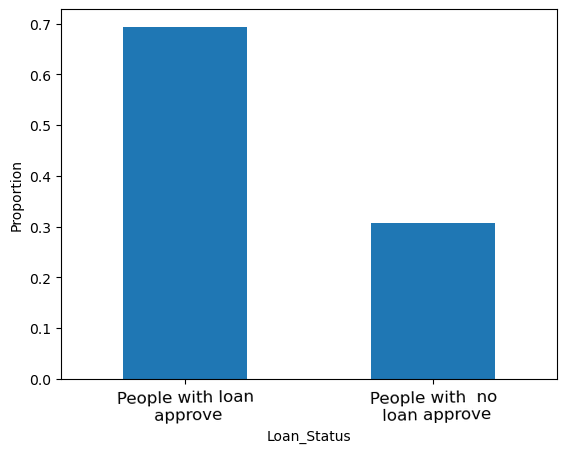

In [126]:
tyc=y_test.value_counts(normalize=True).plot(kind='bar')
tyc.set_xticklabels(['People with loan\n approve','People with  no\n loan approve'],rotation=True,fontsize=12)
plt.ylabel("Proportion")
plt.show()

In [127]:
y_train


27     1.0
61     1.0
421    0.0
106    1.0
491    1.0
      ... 
88     1.0
313    1.0
498    1.0
144    1.0
400    0.0
Name: Loan_Status, Length: 549, dtype: float64

In [128]:
print(X.shape, X_train.shape, X_test.shape)#checking shapes 

(611, 10) (549, 10) (62, 10)


### Distribution happend with same pattern

### STANDARDIZATION

In [129]:
#standrdiation makes the data mean to origin and std to 1
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

sc.fit(X_train)
sc.fit(X_test)
#converting x train and x test ot standard value
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)




In [130]:
X_train_sc

array([[ 0.48989795,  0.71567809,  0.94132042, ...,  0.46442036,
         1.35272892, -0.24976548],
       [ 0.48989795,  0.71567809,  2.51866816, ...,  0.46442036,
         1.35272892, -0.67359122],
       [-2.04124145, -1.39727626, -0.63602731, ..., -2.15322169,
         1.35272892, -0.73213488],
       ...,
       [ 0.48989795,  0.71567809,  0.15264656, ...,  0.46442036,
         0.02147189, -0.69897909],
       [ 0.48989795,  0.71567809,  0.94132042, ...,  0.46442036,
         1.35272892,  0.98003019],
       [ 0.48989795,  0.71567809,  0.94132042, ..., -2.15322169,
         1.35272892, -0.70011586]])

### 

### CHECKING WHICH MODEL IS BEST

In [131]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



#making classfier dict to iterate and find metricis
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear Kernel)': svm.SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier()
}

for name, clf in classifiers.items():#looping in dictioonary keys anf values
   
    clf.fit(X_train_sc, y_train)
    
    
    y_pred = clf.predict(X_test_sc)#predicting x test
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f'{name} Accuracy: {accuracy:}  f1 score:{f1_score(y_test,y_pred)},   recall score:{recall_score(y_test,y_pred)}     and precision score:{precision_score(y_test,y_pred)}')


Logistic Regression Accuracy: 0.8064516129032258  f1 score:0.8723404255319148,   recall score:0.9534883720930233     and precision score:0.803921568627451
SVM (Linear Kernel) Accuracy: 0.8064516129032258  f1 score:0.8723404255319148,   recall score:0.9534883720930233     and precision score:0.803921568627451
Random Forest Accuracy: 0.7741935483870968  f1 score:0.8478260869565216,   recall score:0.9069767441860465     and precision score:0.7959183673469388


## 

### Result from the model loop
1. SVM and logistic have same accuracy
2. We can choose anyone
3. lets choose svm

## 

## 

## Training the model:

### Logistic Model

In [132]:
classifier = LogisticRegression(max_iter=2000)#applying the model

In [133]:
#training the support Vector Macine model
classifier.fit(X_train_sc,y_train)#fitting to x data train and y train

LogisticRegression(max_iter=2000)

## 

### Model Evaluation

In [134]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train_sc)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [135]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8123861566484517


## 

In [136]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test_sc)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)

In [137]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8064516129032258


## 

### Scoring metrics for logistics

In [138]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [139]:
#f1 score value on  test data
f1=f1_score(y_test,X_test_prediction)

In [140]:
#precision score value on  test data
pre=precision_score(y_test,X_test_prediction)

In [141]:
#recall score value on  test data
rec=recall_score(y_test,X_test_prediction)

In [142]:
from sklearn.metrics import mean_squared_error as mse
ms=mse(y_test,X_test_prediction)

rmse=np.sqrt(ms)

### 

In [143]:
print(f"So the scores of the svm model on the test data without hyperparameter tuning are: \n {f1} , precision score is {pre} \n, recall score is {rec}  \nmean squared error is {ms}   \n , root mean squared is {rmse}\n and accuracy is {test_data_accuracy}")

So the scores of the svm model on the test data without hyperparameter tuning are: 
 0.8723404255319148 , precision score is 0.803921568627451 
, recall score is 0.9534883720930233  
mean squared error is 0.1935483870967742   
 , root mean squared is 0.43994134506405985
 and accuracy is 0.8064516129032258


## 

## 

In [144]:
from sklearn.metrics import confusion_matrix

### Confusion matrix before hyperparameter tuning

In [145]:
cm=confusion_matrix(y_test,X_test_prediction)#congusion matrix on test data
cm#shows how many data is predicted correctly and how many not

array([[ 9, 10],
       [ 2, 41]], dtype=int64)

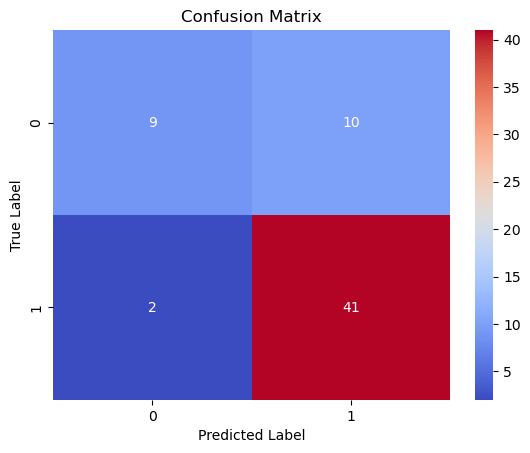

In [146]:
sns.heatmap(cm,cmap='coolwarm',annot=True)#heatmap for the right and wrong prediction
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Note : Info after confusion matrix
1. 2 times model predicts loan is approved when it is not approved
2. 10 times model predicts loan is not selected when it is  approved

## 

## 

### Cross validation before hyper parameter tuning

In [147]:
from sklearn.model_selection import StratifiedKFold#staritified k fold for imbalance dataset
sk=StratifiedKFold(5)#k=5 it will test in 5 pieces of dataset as 1 piece as test others for train
from sklearn.model_selection import cross_val_score as cvs#cross validation score for accuracy
result=cvs(classifier,X_train_sc,y_train,cv=sk)#calculating on train data which is standardized
result

array([0.8       , 0.83636364, 0.81818182, 0.80909091, 0.78899083])

## 

### AVERAGE ACCURACY BY CORSS VALIDATION AT K=5

In [148]:
avg=(0.81300813+ 0.77868852+ 0.77868852+0.85245902+0.78688525)/5
avg

0.801945888

In [149]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


coefficients = model.coef_


feature_importance = np.abs(coefficients).flatten()

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)


            Feature  Importance
7    Credit_History    2.960438
1           Married    0.527974
3         Education    0.392008
4     Self_Employed    0.076344
0            Gender    0.065020
8     Property_Area    0.058533
6  Loan_Amount_Term    0.005183
5        LoanAmount    0.002817
2        Dependents    0.000630
9      Total_income    0.000001


### SO THESE ARE SOME FEATURE IMPORTANCE ACCORDING TO FEATURE

### HYPERPARAMETER TUNING

### GRID SEARCH

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a LogisticRegression object with increased max_iter
classifier = LogisticRegression(max_iter=1000)

In [151]:
# adding various parameters to get selected the best one
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.0, 0.5, 1.0]},
    {'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10]}
]

# Perform GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)#cv Specifies the cross-validation splitting strategy.
#n_jobs he number of jobs (processors) to run in parallel during the grid search

grid_search.fit(X_train_sc, y_train)#fitting the model

# Display results
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy on test data: {grid_search.best_estimator_.score(X_test_sc, y_test)}')

Fitting 5 folds for each of 85 candidates, totalling 425 fits
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on test data: 0.8064516129032258


### Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on test data: 0.81

### RANDOM_SEARCH

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the parameter grid with compatible solver-penalty combinations
param_grid = [
    # For solvers that support 'l1' or 'l2'
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    
    # For solvers that support 'l2' or 'none'
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    
    # For solvers that support 'elasticnet'
    {'solver': ['saga'], 'penalty': ['elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.0, 0.5, 1.0], 'max_iter': [100, 200, 300]}
]

# Initialize the logistic regression model
logistic = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logistic,
    param_distributions=param_grid,
    n_iter=100,  # Number of random parameter settings to sample
    cv=5,        # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,   # Use all available cores
    random_state=42,
    error_score='raise'  # Raise errors during fitting
)

# Fit RandomizedSearchCV
random_search.fit(X_train_sc, y_train)

# Best parameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on the test set
accuracy = random_search.score(X_test_sc, y_test)
print("Test set accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 0.1}
Test set accuracy: 0.8064516129032258


### 

### ON THE BASIS OF BOTH HYPERPARAMETER TUNING   
1. Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear',max_iter=200,class_weight= None,tol= 0.0001}

## 

## 

### ACCURACY AND CROSS VALIDATION ACCURACY AFTER HYPERPARAMETER TUNTING

In [153]:
classifier2 = LogisticRegression(max_iter=200,C= 0.001, penalty= 'l2', solver='liblinear',class_weight= None,tol= 0.0001)#applying the model

In [154]:
#training the support Vector Macine model
classifier2.fit(X_train_sc,y_train)#fitting to x data train and y train

LogisticRegression(C=0.001, max_iter=200, solver='liblinear')

In [155]:
# accuracy score on training data
X_train_prediction2 = classifier2.predict(X_train_sc)
training_data_accuray = accuracy_score(X_train_prediction2,y_train)

In [156]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8123861566484517


In [157]:
# accuracy score on training data
X_test_prediction2 = classifier2.predict(X_test_sc)
test_data_accuracy = accuracy_score(y_test,X_test_prediction2)

In [158]:
#f1 score value on  test data
f1=f1_score(y_test,X_test_prediction2)
#precision score value on  test data
pre=precision_score(y_test,X_test_prediction2)
#recall score value on  test data
rec=recall_score(y_test,X_test_prediction2)
ms=mse(y_test,X_test_prediction2)

rmse=np.sqrt(ms)

In [159]:
print(f"So the scores of the svm model on the test data without hyperparameter tuning are: \n F1 SCORE:{f1} , precision score is {pre} \n, recall score is {rec}  \nmean squared error is {ms}   \n , root mean squared is {rmse}\n and accuracy is {test_data_accuracy}")

So the scores of the svm model on the test data without hyperparameter tuning are: 
 F1 SCORE:0.8723404255319148 , precision score is 0.803921568627451 
, recall score is 0.9534883720930233  
mean squared error is 0.1935483870967742   
 , root mean squared is 0.43994134506405985
 and accuracy is 0.8064516129032258


In [160]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(5)
from sklearn.model_selection import cross_val_score as cvs
result = cvs(classifier2, X_train_sc, y_train, cv=sk, scoring='accuracy')
result

array([0.8       , 0.83636364, 0.82727273, 0.80909091, 0.78899083])

In [161]:
avg=(0.8 + 0.83636364+ 0.82727273+ 0.80909091+ 0.78899083)/5
avg

0.812343622

### 

### Note:
1. After the tuning the average accuracy increase but other metrics like f1,recall,precision remain same.
2. We should use these parameters

## 

### Confusion matrix after hyperparameter tuning

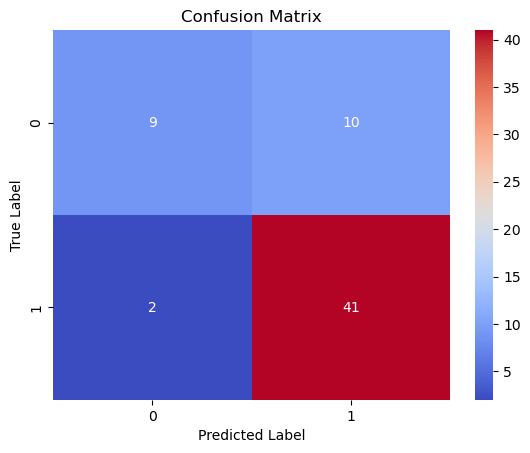

In [162]:
cm=confusion_matrix(y_test,X_test_prediction2)
cm

sns.heatmap(cm,cmap='coolwarm',annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Note : Info after confusion matrix
1. 2 times model predicts loan is approved when it is not approved
2. 10 times model predicts loan is not selected when it is approved

### It is not changed as the recall,f1,precision is still same ,only accuracy increased

### 

### 

### Input testing 

In [165]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1.0,0.0,0.0,1.0,0.0,146.412162,360.0,1.0,2.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,128.000000,360.0,1.0,0.0,6091.0
2,1.0,1.0,0.0,1.0,1.0,66.000000,360.0,1.0,2.0,3000.0
3,1.0,1.0,0.0,0.0,0.0,120.000000,360.0,1.0,2.0,4941.0
4,1.0,0.0,0.0,1.0,0.0,141.000000,360.0,1.0,2.0,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,71.000000,360.0,1.0,0.0,2900.0
610,1.0,1.0,4.0,1.0,0.0,40.000000,180.0,1.0,0.0,4106.0
611,1.0,1.0,1.0,1.0,0.0,253.000000,360.0,1.0,2.0,8312.0
612,1.0,1.0,2.0,1.0,0.0,187.000000,360.0,1.0,2.0,7583.0


In [193]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,LP002979,1.0,1.0,4.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,LP002983,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,LP002984,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [222]:
input_data=[1,1,1,1,0,4444,1222,146.4,360,1,2]
input_data.append(input_data[5]+input_data[6])
input_data.pop(5)
input_data.pop(6)
print(input_data)
input_data=np.asarray(input_data)

input_data2=input_data.reshape(1,-1)

result=classifier2.predict(input_data2)
if result==0:
    print( "Not accepted")
else:
    print( "Loan accepted")

[1, 1, 1, 1, 0, 1222, 360, 1, 2, 5666]
Loan accepted


## 

## 

### STREAMLIT

In [209]:
import pickle

In [210]:
fn='train_model.sav'

In [211]:
pickle.dump(classifier2,open(fn,'wb'))

## 

### Loading the saved model

In [212]:
loaded_model=pickle.load(open('train_model.sav','rb'))

In [223]:
input_data=[1,1,1,1,0,4444,1222,146.4,360,1,2]
input_data.append(input_data[5]+input_data[6])
input_data.pop(5)
input_data.pop(6)
print(input_data)
input_data=np.asarray(input_data)

input_data2=input_data.reshape(1,-1)

result=loaded_model.predict(input_data2)
if result==0:
    print( "Not accepted")
else:
    print( "Loan accepted")

[1, 1, 1, 1, 0, 1222, 360, 1, 2, 5666]
Loan accepted


In [224]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6017 sha256=ec53a337cfa934342276095ee1f8b12698e0f1771a93b8cb4d7937d753f6f414
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\2a\a4\6c\83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin
